In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn. metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import plotly.express as px

# Formatting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

In [2]:
# Read in the data

df = pd.read_excel('online_retail_II.xlsx', sheet_name=0)

df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate                Price          Customer ID  \
0 2009-12-01 07:45:00                 6.95             13085.00   
1 2009-12-01 07:45:00                 6.75             13085.00   
2 2009-12-01 07:45:00                 6.75             13085.00   
3 2009-12-01 07:45:00                 2.10             13085.00   
4 2009-12-01 07:45:00                 1.25             13085.00   

          Country  
0  United Kingdom  
1  United Kingdom  
2  United Kingdom  
3  United Kingdom  
4  United Kingdom

In [3]:
# Check the shape of the loaded data
df.shape


(525461, 8)

In [4]:
# Check what kind of datatypes there are and look out for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
# See the overall properties of numerical data
df.describe()

Quantity                    InvoiceDate  \
count            525461.00                         525461   
mean                 10.34  2010-06-28 11:37:36.845017856   
min               -9600.00            2009-12-01 07:45:00   
25%                   1.00            2010-03-21 12:20:00   
50%                   3.00            2010-07-06 09:51:00   
75%                  10.00            2010-10-15 12:45:00   
max               19152.00            2010-12-09 20:01:00   
std                 107.42                            NaN   

                     Price          Customer ID  
count            525461.00            417534.00  
mean                  4.69             15360.65  
min              -53594.36             12346.00  
25%                   1.25             13983.00  
50%                   2.10             15311.00  
75%                   4.21             16799.00  
max               25111.09             18287.00  
std                 146.13              1680.81

Things that should be explored:
- Negative quantity
- Negative price
- Customer ID nulls


In [6]:
# See the overall properties of object / string data
df.describe(include='O')

Invoice StockCode                         Description         Country
count    525461    525461                              522533          525461
unique    28816      4632                                4681              40
top      537434    85123A  WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom
freq        675      3516                                3549          485852

Things that should be explored:
- Description nulls
- Invoice number is a string (object)?
- StockCode is a string (object)?

# Exploratory Data Analysis & Data Cleaning

#### Let's start by exploring Customer ID and Description nulls

In [7]:
# calculate how percentage of null values
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

In [8]:
missing_percentage

Description                   0.56
Customer ID                  20.54
dtype: float64

Customer ID - lots of missing values - 20,54% are missing. Such information can't be inputed because we can't guess the correct custmer number. 
Customer ID is essential information on customer segmentation. Thus to maintain the integrity of this analysis we decided to remove the rows with missing Customer IDs.

In [9]:
df[df['Customer ID'].isna()].head(15)

Invoice StockCode                       Description  Quantity  \
263   489464     21733                      85123a mixed       -96   
283   489463     71477                             short      -240   
284   489467    85123A                       21733 mixed      -192   
470   489521     21646                               NaN       -50   
577   489525    85226C         BLUE PULL BACK RACING CAR         1   
578   489525     85227       SET/6 3D KIT CARDS FOR KIDS         1   
1055  489548     22271              FELTCRAFT DOLL ROSIE         1   
1056  489548     22254              FELT TOADSTOOL LARGE        12   
1057  489548     22273              FELTCRAFT DOLL MOLLY         3   
1058  489548     22195      LARGE HEART MEASURING SPOONS         1   
1059  489548     22131  FOOD CONTAINER SET 3 LOVE HEART          2   
1060  489548     22079        RIBBON REEL HEARTS DESIGN         10   
1061  489548     22138     BAKING SET 9 PIECE RETROSPOT          3   
1062  489548     22147        FELTCRAFT BUTTERFLY HEARTS         2   
1063  489548     22142      CHRISTMAS CRAFT WHITE FAIRY          2   

             InvoiceDate                Price  Customer ID         Country  
263  2009-12-01 10:52:00                 0.00          NaN  United Kingdom  
283  2009-12-01 10:52:00                 0.00          NaN  United Kingdom  
284  2009-12-01 10:53:00                 0.00          NaN  United Kingdom  
470  2009-12-01 11:44:00                 0.00          NaN  United Kingdom  
577  2009-12-01 11:49:00                 0.55          NaN  United Kingdom  
578  2009-12-01 11:49:00                 0.85          NaN  United Kingdom  
1055 2009-12-01 12:32:00                 2.95          NaN  United Kingdom  
1056 2009-12-01 12:32:00                 1.25          NaN  United Kingdom  
1057 2009-12-01 12:32:00                 2.95          NaN  United Kingdom  
1058 2009-12-01 12:32:00                 1.65          NaN  United Kingdom  
1059 2009-12-01 12:32:00                 1.95          NaN  United Kingdom  
1060 2009-12-01 12:32:00                 1.65          NaN  United Kingdom  
1061 2009-12-01 12:32:00                 4.95          NaN  United Kingdom  
1062 2009-12-01 12:32:00                 1.45          NaN  United Kingdom  
1063 2009-12-01 12:32:00                 1.45          NaN  United Kingdom

In [10]:
df[df['Description'].isna()].describe()

Quantity                    InvoiceDate  \
count              2928.00                           2928   
mean                -21.19  2010-05-20 23:36:21.270491904   
min               -9600.00            2009-12-01 11:44:00   
25%                 -30.00            2010-02-11 16:18:45   
50%                  -4.50            2010-05-11 17:07:00   
75%                   3.00            2010-08-25 12:21:30   
max                9600.00            2010-12-09 17:18:00   
std                 599.53                            NaN   

                     Price          Customer ID  
count              2928.00                 0.00  
mean                  0.00                  NaN  
min                   0.00                  NaN  
25%                   0.00                  NaN  
50%                   0.00                  NaN  
75%                   0.00                  NaN  
max                   0.00                  NaN  
std                   0.00                  NaN

It seems that if Description is null, then the price is always 0.00. This may indicate that there are some technical errors on rows that does not contain Description <br>
Also over 50% rows have negative quantity. <br>
Thus we will scrap all the rows with null Description.

In [11]:
# Removing rows with nulls in 'CustomerID' and 'Description' columns
df = df.dropna(subset=['Customer ID', 'Description'])

In [12]:
# Ensure that there are no null values anymore in the data
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [13]:
# Change the datatype to integer
df['Customer ID'] = df['Customer ID'].astype('Int16')

In [14]:
df.describe()

Quantity                    InvoiceDate  \
count            417534.00                         417534   
mean                 12.76  2010-07-01 01:12:19.787609856   
min               -9360.00            2009-12-01 07:45:00   
25%                   2.00            2010-03-26 11:26:00   
50%                   4.00            2010-07-08 19:12:00   
75%                  12.00            2010-10-14 14:08:00   
max               19152.00            2010-12-09 20:01:00   
std                 101.22                            NaN   

                     Price          Customer ID  
count            417534.00            417534.00  
mean                  3.89             15360.65  
min                   0.00             12346.00  
25%                   1.25             13983.00  
50%                   1.95             15311.00  
75%                   3.75             16799.00  
max               25111.09             18287.00  
std                  71.13              1680.81

### Let's the explore negative quantities

In [15]:
df[df['Quantity'] < 0].head(15)

Invoice StockCode                        Description  Quantity  \
178  C489449     22087           PAPER BUNTING WHITE LACE       -12   
179  C489449    85206A       CREAM FELT EASTER EGG BASKET        -6   
180  C489449     21895      POTTING SHED SOW 'N' GROW SET        -4   
181  C489449     21896                 POTTING SHED TWINE        -6   
182  C489449     22083         PAPER CHAIN KIT RETRO SPOT       -12   
183  C489449     21871                SAVE THE PLANET MUG       -12   
184  C489449     84946    ANTIQUE SILVER TEA GLASS ETCHED       -12   
185  C489449    84970S  HANGING HEART ZINC T-LIGHT HOLDER       -24   
186  C489449     22090          PAPER BUNTING RETRO SPOTS       -12   
196  C489459    90200A         PURPLE SWEETHEART BRACELET        -3   
197  C489459    90200D           PINK SWEETHEART BRACELET        -3   
198  C489459    90200B          BLACK SWEETHEART BRACELET        -3   
199  C489459    90200E          GREEN SWEETHEART BRACELET        -3   
200  C489459    90200C           BLUE SWEETHEART BRACELET        -3   
201  C489459    90185C     BLACK DIAMANTE EXPANDABLE RING        -3   

            InvoiceDate                Price  Customer ID         Country  
178 2009-12-01 10:33:00                 2.95        16321       Australia  
179 2009-12-01 10:33:00                 1.65        16321       Australia  
180 2009-12-01 10:33:00                 4.25        16321       Australia  
181 2009-12-01 10:33:00                 2.10        16321       Australia  
182 2009-12-01 10:33:00                 2.95        16321       Australia  
183 2009-12-01 10:33:00                 1.25        16321       Australia  
184 2009-12-01 10:33:00                 1.25        16321       Australia  
185 2009-12-01 10:33:00                 0.85        16321       Australia  
186 2009-12-01 10:33:00                 2.95        16321       Australia  
196 2009-12-01 10:44:00                 4.25        17592  United Kingdom  
197 2009-12-01 10:44:00                 4.25        17592  United Kingdom  
198 2009-12-01 10:44:00                 4.25        17592  United Kingdom  
199 2009-12-01 10:44:00                 4.25        17592  United Kingdom  
200 2009-12-01 10:44:00                 4.25        17592  United Kingdom  
201 2009-12-01 10:44:00                 4.25        17592  United Kingdom

In [16]:
# is there any other than C -invoices containing negative quantities?
(
df[(df['Quantity'] < 0) & 
(~df['Invoice'].str.get(0).isin(['C']))]
)

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []

It seems that negative quantity invoices always start with letter "C". <br> In the documentation in https://archive.ics.uci.edu/dataset/502/online+retail+ii it is stated that "InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation."<br>So it seems that these are cancelled orders and thus can be removed from the dataset.

In [17]:
#Let's check is there any other letters included on invoice field
df.Invoice.astype('str').str.replace("[0-9]", "", regex=True).unique()

array(['', 'C'], dtype=object)

It seems that there are no other letters, so if we get rid of Cancelled orders we are good to go.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  Int16         
 7   Country      417534 non-null  object        
dtypes: Int16(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 26.7+ MB


In [19]:
# Remove cancelled rows
df = df[~df['Invoice'].astype('str').str.startswith('C')]

In [20]:
# Change correct datatypes
df['Invoice'] = df['Invoice'].astype('Int32')
df['Quantity'] = df['Quantity'].astype('Int16')

In [21]:
# Ensure that overall data is ok.
df.describe()

Invoice             Quantity  \
count            407695.00            407695.00   
mean             514760.71                13.59   
min              489434.00                 1.00   
25%              502764.00                 2.00   
50%              515303.00                 5.00   
75%              527104.00                12.00   
max              538171.00             19152.00   
std               14101.02                96.84   

                         InvoiceDate                Price          Customer ID  
count                         407695            407695.00            407695.00  
mean   2010-07-01 10:10:10.782177792                 3.29             15368.50  
min              2009-12-01 07:45:00                 0.00             12346.00  
25%              2010-03-26 14:01:00                 1.25             13997.00  
50%              2010-07-09 15:46:00                 1.95             15321.00  
75%              2010-10-14 17:09:00                 3.75             16812.00  
max              2010-12-09 20:01:00             10953.50             18287.00  
std                              NaN                34.76              1679.80

In [22]:
# Ensure that overall data is ok.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  Int32         
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  Int16         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  Int16         
 7   Country      407695 non-null  object        
dtypes: Int16(2), Int32(1), datetime64[ns](1), float64(1), object(3)
memory usage: 22.9+ MB


#### Let's check Additional Variable information

Let's check other "Additional Variable Information" statements from https://archive.ics.uci.edu/dataset/502/online+retail+ii <br>
"StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product."

In [23]:
df[df['StockCode'].astype('str').str.match('^\\d{5}$') == False].shape

(56766, 8)

In [24]:
df[df['StockCode'].astype('str').str.match('^\\d{5}$') == False].head(15)

Invoice StockCode                          Description  Quantity  \
1    489434    79323P                   PINK CHERRY LIGHTS        12   
2    489434    79323W                  WHITE CHERRY LIGHTS        12   
12   489436    48173C                DOOR MAT BLACK FLOCK         10   
23   489436    35004B          SET OF 3 BLACK FLYING DUCKS        12   
28   489436    84596F         SMALL MARSHMALLOWS PINK BOWL         8   
29   489436    84596L       BISCUITS SMALL BOWL LIGHT BLUE         8   
42   489437    84507B           STRIPES DESIGN MONKEY DOLL         6   
46   489437    84970S    HANGING HEART ZINC T-LIGHT HOLDER        12   
61   489438    84031A   CHARLIE+LOLA RED HOT WATER BOTTLE         56   
62   489438    84031B  CHARLIE LOLA BLUE HOT WATER BOTTLE         56   
63   489438    84032A   CHARLIE+LOLA PINK HOT WATER BOTTLE        60   
64   489438    84032B  CHARLIE + LOLA RED HOT WATER BOTTLE        56   
65   489438    84519A      TOMATO CHARLIE+LOLA COASTER SET        56   
66   489438    84519B      CARROT CHARLIE+LOLA COASTER SET        60   
67   489438    85132A         CHARLIE + LOLA BISCUITS TINS        60   

           InvoiceDate                Price  Customer ID         Country  
1  2009-12-01 07:45:00                 6.75        13085  United Kingdom  
2  2009-12-01 07:45:00                 6.75        13085  United Kingdom  
12 2009-12-01 09:06:00                 5.95        13078  United Kingdom  
23 2009-12-01 09:06:00                 4.65        13078  United Kingdom  
28 2009-12-01 09:06:00                 1.25        13078  United Kingdom  
29 2009-12-01 09:06:00                 1.25        13078  United Kingdom  
42 2009-12-01 09:08:00                 2.55        15362  United Kingdom  
46 2009-12-01 09:08:00                 0.85        15362  United Kingdom  
61 2009-12-01 09:24:00                 3.00        18102  United Kingdom  
62 2009-12-01 09:24:00                 3.00        18102  United Kingdom  
63 2009-12-01 09:24:00                 1.90        18102  United Kingdom  
64 2009-12-01 09:24:00                 1.90        18102  United Kingdom  
65 2009-12-01 09:24:00                 2.15        18102  United Kingdom  
66 2009-12-01 09:24:00                 2.40        18102  United Kingdom  
67 2009-12-01 09:24:00                 6.38        18102  United Kingdom

In [25]:
df[df['StockCode'].astype('str').str.match('^\\d{5}$') == False].tail(15)

Invoice StockCode                          Description  Quantity  \
525264   538163    84912A                    PINK ROSE WASHBAG         1   
525266   538163    35004C      SET OF 3 COLOURED  FLYING DUCKS         1   
525269   538163    15060B           FAIRY CAKE DESIGN UMBRELLA         1   
525300   538166    85049A        TRADITIONAL CHRISTMAS RIBBONS         5   
525301   538166    85123A   WHITE HANGING HEART T-LIGHT HOLDER         3   
525321   538167    84032A   CHARLIE+LOLA PINK HOT WATER BOTTLE         2   
525325   538167    47591D      PINK FAIRY CAKE CHILDRENS APRON         2   
525333   538168    85049E            SCANDINAVIAN REDS RIBBONS         6   
525350   538168    84030E        ENGLISH ROSE HOT WATER BOTTLE         2   
525351   538168    84029E       RED WOOLLY HOTTIE WHITE HEART.         2   
525387   538170    84029E       RED WOOLLY HOTTIE WHITE HEART.         2   
525388   538170    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         2   
525389   538170    85232B      SET OF 3 BABUSHKA STACKING TINS         2   
525435   538171    47591D      PINK FAIRY CAKE CHILDRENS APRON         1   
525436   538171    47591B             SCOTTIES CHILDRENS APRON         2   

               InvoiceDate                Price  Customer ID         Country  
525264 2010-12-09 17:27:00                 3.75        17841  United Kingdom  
525266 2010-12-09 17:27:00                 5.45        17841  United Kingdom  
525269 2010-12-09 17:27:00                 3.75        17841  United Kingdom  
525300 2010-12-09 18:09:00                 1.25        17965  United Kingdom  
525301 2010-12-09 18:09:00                 2.95        17965  United Kingdom  
525321 2010-12-09 18:58:00                 2.95        14713  United Kingdom  
525325 2010-12-09 18:58:00                 1.95        14713  United Kingdom  
525333 2010-12-09 19:23:00                 1.25        14702  United Kingdom  
525350 2010-12-09 19:23:00                 4.25        14702  United Kingdom  
525351 2010-12-09 19:23:00                 3.75        14702  United Kingdom  
525387 2010-12-09 19:32:00                 3.75        13969  United Kingdom  
525388 2010-12-09 19:32:00                 3.75        13969  United Kingdom  
525389 2010-12-09 19:32:00                 4.95        13969  United Kingdom  
525435 2010-12-09 20:01:00                 1.95        17530  United Kingdom  
525436 2010-12-09 20:01:00                 1.65        17530  United Kingdom

It seems there are a lot of rows (55396 in total) that are not 5-digit integral number StockCodes, altough stated otherwise in the documentation of the dataset. <br>
Head and Tail -rows seems to be valid products. <br>
Let's investigate more of these findings.

In [26]:
df[(df['StockCode'].astype('str').str.match('^\\d{5}$') == False)
& (df['StockCode'].astype('str').str.match('^\\d{5}[a-zA-Z]+$')  == False) #Investigate if the pattern is always the same when the lenght is more than 5 -> 5 numbers and then letters
]

Invoice StockCode Description  Quantity         InvoiceDate  \
89       489439      POST     POSTAGE         3 2009-12-01 09:28:00   
126      489444      POST     POSTAGE         1 2009-12-01 09:55:00   
173      489447      POST     POSTAGE         1 2009-12-01 10:10:00   
625      489526      POST     POSTAGE         6 2009-12-01 11:50:00   
1244     489557      POST     POSTAGE         4 2009-12-01 12:52:00   
...         ...       ...         ...       ...                 ...   
522954   538002        C2    CARRIAGE         1 2010-12-09 11:48:00   
522974   538003      POST     POSTAGE         8 2010-12-09 12:05:00   
523064   538008      POST     POSTAGE         5 2010-12-09 12:17:00   
524491   538093      POST     POSTAGE         5 2010-12-09 14:49:00   
524776   538147         M      Manual         1 2010-12-09 16:11:00   

                      Price  Customer ID          Country  
89                    18.00        12682           France  
126                  141.00        12636              USA  
173                  130.00        12362          Belgium  
625                   18.00        12533          Germany  
1244                  18.00        12490           France  
...                     ...          ...              ...  
522954                50.00        14932  Channel Islands  
522974                18.00        12429          Denmark  
523064                18.00        12683           France  
524491                18.00        12682           France  
524776                15.00        13090   United Kingdom  

[1372 rows x 8 columns]

In [27]:
#Let's check unique value
unique_values = df[(df['StockCode'].astype('str').str.match('^\\d{5}$') == False)
& (df['StockCode'].astype('str').str.match('^\\d{5}[a-zA-Z]+$')  == False) 
]['StockCode'].unique() 

unique_values

array(['POST', 'C2', 'M', 'BANK CHARGES', 'TEST001', 'TEST002', 'PADS',
       'ADJUST', 'D', 'ADJUST2', 'SP1002'], dtype=object)

Let's explore what these are.

In [28]:
for x in list(unique_values):
    display(df[(df['StockCode'] == x)])

Invoice StockCode Description  Quantity         InvoiceDate  \
89       489439      POST     POSTAGE         3 2009-12-01 09:28:00   
126      489444      POST     POSTAGE         1 2009-12-01 09:55:00   
173      489447      POST     POSTAGE         1 2009-12-01 10:10:00   
625      489526      POST     POSTAGE         6 2009-12-01 11:50:00   
1244     489557      POST     POSTAGE         4 2009-12-01 12:52:00   
...         ...       ...         ...       ...                 ...   
522916   537967      POST     POSTAGE         1 2010-12-09 11:31:00   
522930   537995      POST     POSTAGE         2 2010-12-09 11:39:00   
522974   538003      POST     POSTAGE         8 2010-12-09 12:05:00   
523064   538008      POST     POSTAGE         5 2010-12-09 12:17:00   
524491   538093      POST     POSTAGE         5 2010-12-09 14:49:00   

                      Price  Customer ID  Country  
89                    18.00        12682   France  
126                  141.00        12636      USA  
173                  130.00        12362  Belgium  
625                   18.00        12533  Germany  
1244                  18.00        12490   France  
...                     ...          ...      ...  
522916                18.00        12494   France  
522930                18.00        12712  Germany  
522974                18.00        12429  Denmark  
523064                18.00        12683   France  
524491                18.00        12682   France  

[738 rows x 8 columns]

Invoice StockCode Description  Quantity         InvoiceDate  \
9292     490127        C2    CARRIAGE         1 2009-12-03 18:13:00   
14502    490542        C2    CARRIAGE         1 2009-12-07 09:42:00   
19541    490998        C2    CARRIAGE         1 2009-12-08 17:24:00   
22803    491160        C2    CARRIAGE         1 2009-12-10 10:29:00   
32964    492092        C2    CARRIAGE         1 2009-12-15 14:03:00   
...         ...       ...         ...       ...                 ...   
504361   536540        C2    CARRIAGE         1 2010-12-01 14:05:00   
515057   537368        C2    CARRIAGE         1 2010-12-06 12:40:00   
515390   537378        C2    CARRIAGE         1 2010-12-06 13:06:00   
522913   537963        C2    CARRIAGE         1 2010-12-09 11:30:00   
522954   538002        C2    CARRIAGE         1 2010-12-09 11:48:00   

                      Price  Customer ID          Country  
9292                  50.00        14156             EIRE  
14502                 50.00        14911             EIRE  
19541                 50.00        16253   United Kingdom  
22803                 50.00        14911             EIRE  
32964                 50.00        14156             EIRE  
...                     ...          ...              ...  
504361                50.00        14911             EIRE  
515057                50.00        14911             EIRE  
515390                50.00        14911             EIRE  
522913                50.00        13369   United Kingdom  
522954                50.00        14932  Channel Islands  

[120 rows x 8 columns]

Invoice StockCode Description  Quantity         InvoiceDate  \
11310    490300         M      Manual         1 2009-12-04 14:19:00   
11311    490300         M      Manual         1 2009-12-04 14:19:00   
16107    490727         M      Manual         1 2009-12-07 16:38:00   
17386    490760         M      Manual         1 2009-12-08 09:49:00   
17887    490881         M      Manual         1 2009-12-08 12:58:00   
...         ...       ...         ...       ...                 ...   
516892   537435         M      Manual         2 2010-12-06 16:58:00   
521074   537800         M      Manual        12 2010-12-08 13:08:00   
521122   537804         M      Manual        12 2010-12-08 13:17:00   
521124   537804         M      Manual        12 2010-12-08 13:17:00   
524776   538147         M      Manual         1 2010-12-09 16:11:00   

                      Price  Customer ID         Country  
11310                  0.85        12970  United Kingdom  
11311                  0.21        12970  United Kingdom  
16107                  0.00        17231  United Kingdom  
17386                 10.00        14295  United Kingdom  
17887                 10.00        16210  United Kingdom  
...                     ...          ...             ...  
516892                 5.95        17920  United Kingdom  
521074                 0.19        12748  United Kingdom  
521122                 2.95        12748  United Kingdom  
521124                 0.19        12748  United Kingdom  
524776                15.00        13090  United Kingdom  

[426 rows x 8 columns]

Invoice     StockCode    Description  Quantity         InvoiceDate  \
18466    490948  BANK CHARGES   Bank Charges         1 2009-12-08 14:29:00   
94431    498269  BANK CHARGES   Bank Charges         1 2010-02-17 15:03:00   
148098   503497  BANK CHARGES   Bank Charges         1 2010-04-01 12:07:00   
153573   503960  BANK CHARGES   Bank Charges         1 2010-04-08 16:50:00   
167424   505204  BANK CHARGES   Bank Charges         1 2010-04-20 16:24:00   
206572   509375  BANK CHARGES   Bank Charges         1 2010-05-21 14:40:00   
210149   509669  BANK CHARGES   Bank Charges         1 2010-05-25 12:03:00   
231102   511774  BANK CHARGES   Bank Charges         1 2010-06-10 12:16:00   
240612   512658  BANK CHARGES   Bank Charges         1 2010-06-17 11:24:00   
272460   515845  BANK CHARGES   Bank Charges         1 2010-07-15 11:21:00   
272462   515855  BANK CHARGES   Bank Charges         1 2010-07-15 11:24:00   
290258   517648  BANK CHARGES   Bank Charges         1 2010-07-30 13:52:00   
290308   517652  BANK CHARGES   Bank Charges         1 2010-07-30 14:07:00   
300726   518666  BANK CHARGES   Bank Charges         1 2010-08-10 14:45:00   
300727   518667  BANK CHARGES   Bank Charges         1 2010-08-10 14:47:00   
331934   521809  BANK CHARGES   Bank Charges         1 2010-09-08 14:33:00   
332015   521812  BANK CHARGES   Bank Charges         1 2010-09-08 15:00:00   
455268   532637  BANK CHARGES   Bank Charges         1 2010-11-12 16:18:00   
493162   535474  BANK CHARGES   Bank Charges         1 2010-11-26 13:56:00   
507344   536779  BANK CHARGES   Bank Charges         1 2010-12-02 15:08:00   

                      Price  Customer ID         Country  
18466                 15.00        16805  United Kingdom  
94431                 15.00        16928  United Kingdom  
148098                15.00        17539  United Kingdom  
153573                15.00        12843  United Kingdom  
167424                15.00        17448  United Kingdom  
206572                15.00        17448  United Kingdom  
210149                15.00        17448  United Kingdom  
231102                15.00        17032  United Kingdom  
240612                15.00        14085  United Kingdom  
272460                15.00        14606  United Kingdom  
272462                15.00        17448  United Kingdom  
290258                15.00        14606  United Kingdom  
290308                15.00        17448  United Kingdom  
300726                15.00        14606  United Kingdom  
300727                15.00        14606  United Kingdom  
331934                15.00        14911            EIRE  
332015                15.00        16271  United Kingdom  
455268                15.00        13174  United Kingdom  
493162                15.00        16928  United Kingdom  
507344                15.00        15823  United Kingdom

Invoice StockCode              Description  Quantity  \
27994    491725   TEST001  This is a test product.        10   
28251    491742   TEST001  This is a test product.         5   
28254    491744   TEST001  This is a test product.         5   
39398    492718   TEST001  This is a test product.         5   
45228    493410   TEST001  This is a test product.         5   
45230    493412   TEST001  This is a test product.         5   
56117    494450   TEST001  This is a test product.         5   
66084    495295   TEST001  This is a test product.         5   
89084    497819   TEST001  This is a test product.         5   
89180    497843   TEST001  This is a test product.         5   
156017   504188   TEST001  This is a test product.         5   

               InvoiceDate                Price  Customer ID         Country  
27994  2009-12-14 08:34:00                 4.50        12346  United Kingdom  
28251  2009-12-14 11:00:00                 4.50        12346  United Kingdom  
28254  2009-12-14 11:02:00                 4.50        12346  United Kingdom  
39398  2009-12-18 10:47:00                 4.50        12346  United Kingdom  
45228  2010-01-04 09:24:00                 4.50        12346  United Kingdom  
45230  2010-01-04 09:53:00                 4.50        12346  United Kingdom  
56117  2010-01-14 13:50:00                 4.50        12346  United Kingdom  
66084  2010-01-22 13:30:00                 4.50        12346  United Kingdom  
89084  2010-02-12 14:58:00                 0.00        14103  United Kingdom  
89180  2010-02-12 15:47:00                 0.00        14827  United Kingdom  
156017 2010-04-12 09:52:00                 4.50        16454  United Kingdom

Invoice StockCode              Description  Quantity  \
39411   492722   TEST002  This is a test product.         1   

              InvoiceDate                Price  Customer ID         Country  
39411 2009-12-18 10:55:00                 1.00        12346  United Kingdom

Invoice StockCode                 Description  Quantity  \
62299    494914      PADS  PADS TO MATCH ALL CUSHIONS         1   
74731    496222      PADS  PADS TO MATCH ALL CUSHIONS         1   
77702    496473      PADS  PADS TO MATCH ALL CUSHIONS         1   
79794    496643      PADS  PADS TO MATCH ALL CUSHIONS         1   
90798    497935      PADS  PADS TO MATCH ALL CUSHIONS         1   
97716    498562      PADS  PADS TO MATCH ALL CUSHIONS         1   
101718   499056      PADS  PADS TO MATCH ALL CUSHIONS         1   
104480   499399      PADS  PADS TO MATCH ALL CUSHIONS         1   
123947   501176      PADS  PADS TO MATCH ALL CUSHIONS         1   
156809   504332      PADS  PADS TO MATCH ALL CUSHIONS         1   
178629   506303      PADS  PADS TO MATCH ALL CUSHIONS         1   
341826   522766      PADS  PADS TO MATCH ALL CUSHIONS         1   
440930   531433      PADS  PADS TO MATCH ALL CUSHIONS         1   
468280   533528      PADS  PADS TO MATCH ALL CUSHIONS         1   

               InvoiceDate                Price  Customer ID         Country  
62299  2010-01-19 17:04:00                 0.00        16705  United Kingdom  
74731  2010-01-29 13:53:00                 0.00        13583  United Kingdom  
77702  2010-02-01 15:38:00                 0.00        17350  United Kingdom  
79794  2010-02-03 11:58:00                 0.00        13408  United Kingdom  
90798  2010-02-15 10:47:00                 0.00        13408  United Kingdom  
97716  2010-02-21 12:03:00                 0.00        15182  United Kingdom  
101718 2010-02-24 13:46:00                 0.00        13765  United Kingdom  
104480 2010-02-26 13:26:00                 0.00        14459  United Kingdom  
123947 2010-03-15 11:00:00                 0.00        14857  United Kingdom  
156809 2010-04-12 16:30:00                 0.00        12671         Germany  
178629 2010-04-29 10:43:00                 0.00        14249  United Kingdom  
341826 2010-09-16 13:58:00                 0.00        15182  United Kingdom  
440930 2010-11-08 11:54:00                 0.00        13317  United Kingdom  
468280 2010-11-17 15:08:00                 0.00        15750  United Kingdom

Invoice StockCode                          Description  Quantity  \
70976   495733    ADJUST  Adjustment by john on 26/01/2010 16         1   
70977   495735    ADJUST  Adjustment by john on 26/01/2010 16         1   
70978   495734    ADJUST  Adjustment by john on 26/01/2010 16         1   
70980   495736    ADJUST  Adjustment by john on 26/01/2010 16         1   
70985   495742    ADJUST  Adjustment by john on 26/01/2010 16         1   
71022   495745    ADJUST  Adjustment by john on 26/01/2010 16         1   
71023   495748    ADJUST  Adjustment by john on 26/01/2010 16         1   
71033   495747    ADJUST  Adjustment by john on 26/01/2010 16         1   
71034   495750    ADJUST  Adjustment by john on 26/01/2010 16         1   
71037   495756    ADJUST  Adjustment by john on 26/01/2010 16         1   
71038   495755    ADJUST  Adjustment by john on 26/01/2010 16         1   
71039   495753    ADJUST  Adjustment by john on 26/01/2010 16         1   
71040   495754    ADJUST  Adjustment by john on 26/01/2010 16         1   
71042   495758    ADJUST  Adjustment by john on 26/01/2010 16         1   
71044   495760    ADJUST  Adjustment by john on 26/01/2010 16         1   
71047   495763    ADJUST  Adjustment by john on 26/01/2010 16         1   
71050   495766    ADJUST  Adjustment by john on 26/01/2010 16         1   
71056   495773    ADJUST  Adjustment by john on 26/01/2010 16         1   
71058   495776    ADJUST  Adjustment by john on 26/01/2010 17         1   
71059   495777    ADJUST  Adjustment by john on 26/01/2010 17         1   
71061   495780    ADJUST  Adjustment by john on 26/01/2010 17         1   
71064   495782    ADJUST  Adjustment by john on 26/01/2010 17         1   
71065   495783    ADJUST  Adjustment by john on 26/01/2010 17         1   
71066   495784    ADJUST  Adjustment by john on 26/01/2010 17         1   
71068   495788    ADJUST  Adjustment by john on 26/01/2010 17         1   
71071   495791    ADJUST  Adjustment by john on 26/01/2010 17         1   
71072   495792    ADJUST  Adjustment by john on 26/01/2010 17         1   
71074   495794    ADJUST  Adjustment by john on 26/01/2010 17         1   
71075   495795    ADJUST  Adjustment by john on 26/01/2010 17         1   
71079   495799    ADJUST  Adjustment by john on 26/01/2010 17         1   
71081   495801    ADJUST  Adjustment by john on 26/01/2010 17         1   
71082   495802    ADJUST  Adjustment by john on 26/01/2010 17         1   

              InvoiceDate                Price  Customer ID         Country  
70976 2010-01-26 16:21:00                68.34        14911            EIRE  
70977 2010-01-26 16:22:00               201.56        12745            EIRE  
70978 2010-01-26 16:22:00               205.82        14911            EIRE  
70980 2010-01-26 16:23:00                21.00        12606           Spain  
70985 2010-01-26 16:25:00                63.24        12404         Finland  
71022 2010-01-26 16:26:00                56.73        12466          France  
71023 2010-01-26 16:26:00               117.72        16291        Portugal  
71033 2010-01-26 16:26:00               129.23        12555           Spain  
71034 2010-01-26 16:27:00               132.79        14156            EIRE  
71037 2010-01-26 16:29:00                39.67        14912           Italy  
71038 2010-01-26 16:29:00               342.80        14413  United Kingdom  
71039 2010-01-26 16:29:00               178.31        14653  United Kingdom  
71040 2010-01-26 16:29:00                15.58        12846  United Kingdom  
71042 2010-01-26 16:30:00               274.20        14911            EIRE  
71044 2010-01-26 16:31:00                64.13        14156            EIRE  
71047 2010-01-26 16:34:00               107.14        16047            EIRE  
71050 2010-01-26 16:38:00                84.58        12709         Germany  
71056 2010-01-26 16:57:00                 4.57        12600         Germany  
71058 2010-01-26 17:03:00                49.35   

Invoice StockCode Description  Quantity         InvoiceDate  \
160443   504700         D    Discount         1 2010-04-15 18:08:00   
212633   509979         D    Discount         1 2010-05-26 14:07:00   
312285   519808         D    Discount       192 2010-08-20 12:50:00   
494226   535657         D    Discount         1 2010-11-28 11:20:00   
501237   536158         D    Discount         1 2010-11-30 11:57:00   

                      Price  Customer ID         Country  
160443                57.63        17032  United Kingdom  
212633               101.99        12843  United Kingdom  
312285                 1.00        16422  United Kingdom  
494226                13.98        14527  United Kingdom  
501237                32.29        13634  United Kingdom

Invoice StockCode                          Description  Quantity  \
249672   513564   ADJUST2  Adjustment by Peter on Jun 25 2010          1   
249673   513566   ADJUST2  Adjustment by Peter on Jun 25 2010          1   
249674   513565   ADJUST2  Adjustment by Peter on Jun 25 2010          1   

               InvoiceDate                Price  Customer ID         Country  
249672 2010-06-25 14:15:00               300.13        17050  United Kingdom  
249673 2010-06-25 14:15:00               358.47        17364  United Kingdom  
249674 2010-06-25 14:15:00                72.45        16422  United Kingdom

Invoice StockCode             Description  Quantity  \
377066   525772    SP1002  KID'S CHALKBOARD/EASEL         1   
377387   525837    SP1002  KID'S CHALKBOARD/EASEL         4   

               InvoiceDate                Price  Customer ID         Country  
377066 2010-10-07 11:12:00                 2.95        12748  United Kingdom  
377387 2010-10-07 12:23:00                 2.95        17841  United Kingdom

Looks like StockCode 'SP1002' is only valid actual product with price. Let's include that in the dataset and remove others.

In [29]:
# Remove following StockCodes
remove_StockCodes = list(unique_values[:-1])
remove_StockCodes

['POST',
 'C2',
 'M',
 'BANK CHARGES',
 'TEST001',
 'TEST002',
 'PADS',
 'ADJUST',
 'D',
 'ADJUST2']

In [30]:
df = df[~df['StockCode'].isin(remove_StockCodes)]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406325 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406325 non-null  Int32         
 1   StockCode    406325 non-null  object        
 2   Description  406325 non-null  object        
 3   Quantity     406325 non-null  Int16         
 4   InvoiceDate  406325 non-null  datetime64[ns]
 5   Price        406325 non-null  float64       
 6   Customer ID  406325 non-null  Int16         
 7   Country      406325 non-null  object        
dtypes: Int16(2), Int32(1), datetime64[ns](1), float64(1), object(3)
memory usage: 22.9+ MB


In [32]:
df.describe()

Invoice             Quantity  \
count            406325.00            406325.00   
mean             514761.25                13.62   
min              489434.00                 1.00   
25%              502764.00                 2.00   
50%              515305.00                 5.00   
75%              527104.00                12.00   
max              538171.00             19152.00   
std               14101.72                97.00   

                         InvoiceDate                Price          Customer ID  
count                         406325            406325.00            406325.00  
mean   2010-07-01 10:15:28.353460992                 2.99             15373.66  
min              2009-12-01 07:45:00                 0.00             12346.00  
25%              2010-03-26 14:01:00                 1.25             14004.00  
50%              2010-07-09 15:48:00                 1.95             15326.00  
75%              2010-10-14 17:09:00                 3.75             16814.00  
max              2010-12-09 20:01:00               295.00             18287.00  
std                              NaN                 4.29              1677.38

In [33]:
df.describe(include='O')

StockCode                         Description         Country
count     406325                              406325          406325
unique      4007                                4433              37
top       85123A  WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom
freq        3153                                3153          370476

There are still rows with 0.00 price tag. Let's explore them.

In [34]:
df[df['Price'] == 0.00]

Invoice StockCode                        Description  Quantity  \
4674     489825     22076                 6 RIBBONS EMPIRE          12   
6781     489998     48185                DOOR MAT FAIRY CAKE         2   
18738    490961     22065     CHRISTMAS PUDDING TRINKET POT          1   
18739    490961     22142       CHRISTMAS CRAFT WHITE FAIRY         12   
32916    492079     85042          ANTIQUE LILY FAIRY LIGHTS         8   
40101    492760     21143    ANTIQUE GLASS HEART DECORATION         12   
47126    493761     79320                    FLAMINGO LIGHTS        24   
48342    493899     22355        CHARLOTTE BAG , SUKI DESIGN        10   
57619    494607     21533          RETRO SPOT LARGE MILK JUG        12   
111348   500073     21662         VINTAGE GLASS COFFEE CADDY         1   
149201   503585     22459       CAST IRON HOOK GARDEN TROWEL         8   
149202   503585     22458         CAST IRON HOOK GARDEN FORK         8   
166143   505083     22376  AIRLINE BAG VINTAGE JET SET WHITE         1   
232526   511902     21765            HANGING METAL BIRD BATH         1   
240455   512609     20914   SET/5 RED SPOTTY LID GLASS BOWLS         2   
248583   513416     22423           REGENCY CAKESTAND 3 TIER         5   
276858   516304     22690      DOORMAT HOME SWEET HOME BLUE          6   
296375   518231     22472          TV DINNER TRAY DOLLY GIRL         9   
327801   521375     22202            MILK PAN PINK RETROSPOT         3   
358820   524181    46000M       POLYESTER FILLER PAD 45x45cm       648   
364333   524701     22218              CAKE STAND LACE WHITE         2   
392008   527084     22630               DOLLY GIRL LUNCH BOX        64   
400047   527696     22121         NOEL WOODEN BLOCK LETTERS          1   
439309   531361     21843           RED RETROSPOT CAKE STAND         2   
453705   532470     22624               IVORY KITCHEN SCALES         2   
471775   533822     22846         BREAD BIN DINER STYLE RED          1   
471776   533822     22845   VINTAGE CREAM CAT FOOD CONTAINER         1   
512240   537197     22841       ROUND CAKE TIN VINTAGE GREEN         1   

               InvoiceDate                Price  Customer ID         Country  
4674   2009-12-02 13:34:00                 0.00        16126  United Kingdom  
6781   2009-12-03 11:19:00                 0.00        15658  United Kingdom  
18738  2009-12-08 15:25:00                 0.00        14108  United Kingdom  
18739  2009-12-08 15:25:00                 0.00        14108  United Kingdom  
32916  2009-12-15 13:49:00                 0.00        15070  United Kingdom  
40101  2009-12-18 14:22:00                 0.00        18071  United Kingdom  
47126  2010-01-06 14:54:00                 0.00        14258  United Kingdom  
48342  2010-01-08 10:43:00                 0.00        12417         Belgium  
57619  2010-01-15 12:43:00                 0.00        16858  United Kingdom  
111348 2010-03-04 11:44:00                 0.00        13047  United Kingdom  
149201 2010-04-01 17:13:00                 0.00        13047  United Kingdom  
149202 2010-04-01 17:13:00                 0.00        13047  United Kingdom  
166143 2010-04-20 09:56:00                 0.00        12623         Germany  
232526 2010-06-11 11:12:00                 0.00        12748  United Kingdom  
240455 2010-06-17 10:12:00                 0.00        14045  United Kingdom  
248583 2010-06-24 12:34:00                 0.00        13089  United Kingdom  
276858 2010-07-19 13:13:00                 0.00        14025  United Kingdom  
296375 2010-08-05 15:28:00                 0.00        12471         Germany  
327801 2010-09-05 11:58:00                 0.00        12647         Germany  
358820 2010-09-27 16:59:00                 0.00        17450  United Kingdom  
364333 2010-09-30 12:19:00                 0.00        17667  United Kingdom  
392008 2010-10-14 15:33:00                 0.00        14646     Netherlands  
400047 2010-10-18 15:13:00                 0

In [35]:
df[df['Price'] == 0.00].shape

(28, 8)

Only 28 records. Free items? Also some filler pads. We don't know what these are. For sake of simplicity let's get rid of these 28 rows.

In [36]:
df = df[df['Price'] > 0]

In [37]:
df.describe()

Invoice             Quantity  \
count            406297.00            406297.00   
mean             514761.51                13.62   
min              489434.00                 1.00   
25%              502764.00                 2.00   
50%              515305.00                 5.00   
75%              527104.00                12.00   
max              538171.00             19152.00   
std               14101.54                97.00   

                         InvoiceDate                Price          Customer ID  
count                         406297            406297.00            406297.00  
mean   2010-07-01 10:18:47.703674880                 2.99             15373.75  
min              2009-12-01 07:45:00                 0.03             12346.00  
25%              2010-03-26 14:01:00                 1.25             14006.00  
50%              2010-07-09 15:48:00                 1.95             15326.00  
75%              2010-10-14 17:09:00                 3.75             16814.00  
max              2010-12-09 20:01:00               295.00             18287.00  
std                              NaN                 4.29              1677.34

In [38]:
# Explore the cheapest item
min(df.Price)

0.03

In [39]:
# Seems legit, some sort of pen?
df[df['Price'] == 0.03]

Invoice StockCode                    Description  Quantity  \
298952   518505     16053  POPART COL BALLPOINT PEN ASST      2000   
358773   524174     16053  POPART COL BALLPOINT PEN ASST      2000   

               InvoiceDate                Price  Customer ID         Country  
298952 2010-08-09 13:10:00                 0.03        14277          France  
358773 2010-09-27 16:30:00                 0.03        13687  United Kingdom

# Feature engineering

We are doing the RFM Segmentation analysis for customer level. Thus we need to aggregate the data on Customer ID -level. <br>
We also need Total Sales by each row to get the aggregated total sales per customer.

In [40]:
# calculate total sales by multplying price with quantity
df['Sales'] = df['Quantity'] * df['Price']

In [41]:
# Aggregate the data on Customer ID level. Frequency is calculated by Disctinct Count of Invoice numbers
df_agg = (df
          .groupby('Customer ID', as_index=False)
          .agg(
              MonetaryValue = ('Sales', 'sum'),
              Frequency = ('Invoice', 'nunique'),
              LastInvoiceDate = ('InvoiceDate', 'max')
          )
         )

df_agg
          

Customer ID        MonetaryValue  Frequency     LastInvoiceDate
0           12346               169.36          2 2010-06-28 13:53:00
1           12347              1323.32          2 2010-12-07 14:57:00
2           12348               221.16          1 2010-09-27 14:59:00
3           12349              2221.14          2 2010-10-28 08:23:00
4           12351               300.93          1 2010-11-29 15:23:00
...           ...                  ...        ...                 ...
4280        18283               641.77          6 2010-11-22 15:30:00
4281        18284               411.68          1 2010-10-04 11:33:00
4282        18285               377.00          1 2010-02-17 10:24:00
4283        18286              1246.43          2 2010-08-20 11:57:00
4284        18287              2295.71          4 2010-11-22 11:51:00

[4285 rows x 4 columns]

Let's create a variable what we can use when calculating Recency. One way to obtain it is to use max LastInvoiceDate. Then we can substract each customers Last Invoice Date from max date.

In [42]:
max_invoice_date = df_agg['LastInvoiceDate'].max()
max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [43]:
# calculate recency
df_agg['Recency'] = (max_invoice_date - df_agg['LastInvoiceDate']).dt.days
df_agg.head()

Customer ID        MonetaryValue  Frequency     LastInvoiceDate  Recency
0        12346               169.36          2 2010-06-28 13:53:00      164
1        12347              1323.32          2 2010-12-07 14:57:00        2
2        12348               221.16          1 2010-09-27 14:59:00       73
3        12349              2221.14          2 2010-10-28 08:23:00       42
4        12351               300.93          1 2010-11-29 15:23:00       10

In [44]:
df_agg.shape

(4285, 5)

In [45]:
df_agg.describe()

Customer ID        MonetaryValue            Frequency  \
count              4285.00              4285.00              4285.00   
mean              15356.81              2024.13                 4.43   
min               12346.00                 1.55                 1.00   
25%               13891.00               307.56                 1.00   
50%               15362.00               702.90                 2.00   
75%               16840.00              1704.29                 5.00   
max               18287.00            349164.35               183.00   
std                1699.84              8813.96                 7.94   

                     LastInvoiceDate              Recency  
count                           4285              4285.00  
mean   2010-09-11 00:06:10.431738624                89.55  
min              2009-12-01 10:49:00                 0.00  
25%              2010-07-27 14:39:00                17.00  
50%              2010-10-19 12:10:00                51.00  
75%              2010-11-22 11:24:00               135.00  
max              2010-12-09 20:01:00               373.00  
std                              NaN                96.36

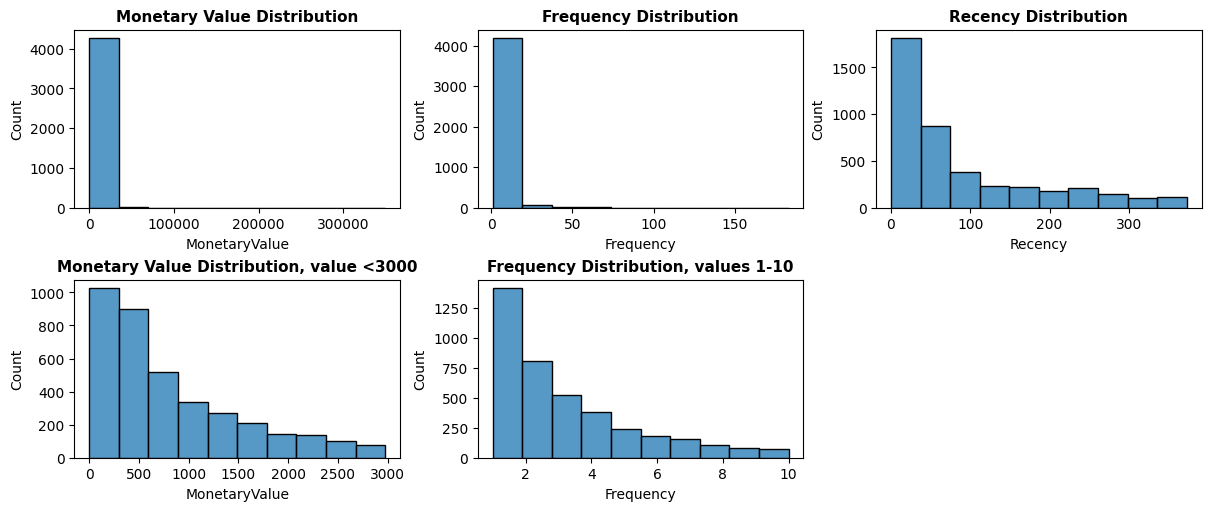

In [46]:
# Visualise data distribution to see if the data is skewed.

fig, ax = plt.subplots(2, 3, 
                       constrained_layout=True,
                       figsize=(12,5) 
                      )
title_font = {'fontsize': 11,
              'fontweight': 'bold'}

sns.histplot(x='MonetaryValue', bins=10,  data=df_agg, ax=ax[0,0])
ax[0,0].set_title('Monetary Value Distribution', fontdict=title_font)

sns.histplot(x='Frequency', bins=10,  data=df_agg, ax=ax[0,1])
ax[0,1].set_title('Frequency Distribution', fontdict=title_font)

sns.histplot(x='Recency', bins=10,  data=df_agg, ax=ax[0,2])
ax[0,2].set_title('Recency Distribution', fontdict=title_font)

sns.histplot(x='MonetaryValue', bins=10,  data=df_agg[df_agg['MonetaryValue'] < 3000], ax=ax[1,0])
ax[1,0].set_title('Monetary Value Distribution, value <3000', fontdict=title_font)

sns.histplot(x='Frequency', bins=10,  data=df_agg[df_agg['Frequency'] < 11], ax=ax[1,1])
ax[1,1].set_title('Frequency Distribution, values 1-10', fontdict=title_font)

fig.delaxes(ax[1,2])

plt.show()

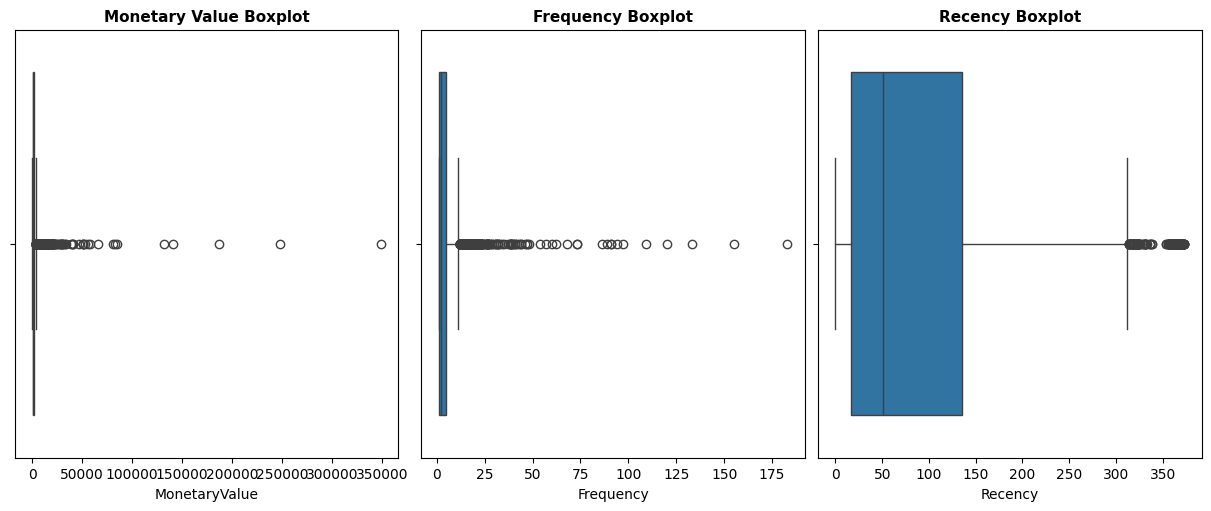

In [47]:
# Use boxplots to find possible outliers.

fig, ax = plt.subplots(1, 3, 
                       constrained_layout=True,
                       figsize=(12,5) 
                      )
title_font = {'fontsize': 11,
              'fontweight': 'bold'}

sns.boxplot(x='MonetaryValue',  data=df_agg, ax=ax[0])
ax[0].set_title('Monetary Value Boxplot', fontdict=title_font)

sns.boxplot(x='Frequency',  data=df_agg, ax=ax[1])
ax[1].set_title('Frequency Boxplot', fontdict=title_font)

sns.boxplot(x='Recency',   data=df_agg, ax=ax[2])
ax[2].set_title('Recency Boxplot', fontdict=title_font)

plt.show()

Even though there are outliers, in RFM these are not removed. <br>
Many times the ourliers consists so called most valuable customers. <br>
One valid option I am about to use is to separate so called outlier customers -data from "basic" customers. <br>
Next we will separate our outliers based on monetary value and frequency. <br>
We must be aware of the fact that these following oulier groups do have overlapping Customer IDs.

In [48]:
# Separate Frequency outliers from K-Means Clustering

F_Q1 = df_agg['Frequency'].quantile(0.25)
F_Q3 = df_agg['Frequency'].quantile(0.75)

F_IQR = F_Q3 - F_Q1

df_frequency_outliers = df_agg[(df_agg['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (df_agg['Frequency'] < (F_Q1 - 1.5 * F_IQR))]
df_frequency_outliers.describe()

Customer ID        MonetaryValue            Frequency  \
count               279.00               279.00               279.00   
mean              15352.66             14409.77                23.81   
min               12437.00              1094.39                12.00   
25%               13800.00              4331.56                13.00   
50%               15465.00              6615.77                17.00   
75%               16828.50             11692.41                23.00   
max               18260.00            349164.35               183.00   
std                1748.43             31381.76                21.93   

                     LastInvoiceDate              Recency  
count                            279               279.00  
mean   2010-11-23 11:06:20.645161216                16.09  
min              2010-05-12 16:51:00                 0.00  
25%              2010-11-20 13:14:30                 2.00  
50%              2010-12-02 10:46:00                 7.00  
75%              2010-12-07 11:08:30                19.00  
max              2010-12-09 19:32:00               211.00  
std                              NaN                26.59

In [49]:
# Separate Monetary Value outliers from K-Means Clustering

M_Q1 = df_agg['MonetaryValue'].quantile(0.25)
M_Q3 = df_agg['MonetaryValue'].quantile(0.75)

M_IQR = M_Q3 - M_Q1

df_monetary_outliers = df_agg[(df_agg['MonetaryValue'] > (M_Q3 + 1.5 * M_IQR)) | (df_agg['MonetaryValue'] < (M_Q1 - 1.5 * M_IQR))]
df_monetary_outliers.describe()

Customer ID        MonetaryValue            Frequency  \
count               423.00               423.00               423.00   
mean              15103.04             12188.14                17.17   
min               12357.00              3802.04                 1.00   
25%               13622.00              4605.94                 8.00   
50%               14961.00              6191.32                12.00   
75%               16692.00             10273.24                18.00   
max               18260.00            349164.35               183.00   
std                1728.66             25830.87                19.73   

                     LastInvoiceDate              Recency  
count                            423               423.00  
mean   2010-11-09 12:26:02.978723328                30.04  
min              2009-12-10 18:03:00                 0.00  
25%              2010-11-08 13:17:30                 3.00  
50%              2010-11-26 12:19:00                13.00  
75%              2010-12-06 10:34:30                31.00  
max              2010-12-09 19:32:00               364.00  
std                              NaN                51.54

Next we will create data for non-outliers:

In [50]:
# The dataset of non outliers

df_non_outliers = df_agg[(~df_agg.index.isin(df_monetary_outliers.index)) & (~df_agg.index.isin(df_frequency_outliers.index))]

df_non_outliers.describe()

Customer ID        MonetaryValue            Frequency  \
count              3809.00              3809.00              3809.00   
mean              15376.48               885.50                 2.86   
min               12346.00                 1.55                 1.00   
25%               13912.00               279.91                 1.00   
50%               15389.00               588.05                 2.00   
75%               16854.00              1269.05                 4.00   
max               18287.00              3788.21                11.00   
std                1693.20               817.67                 2.24   

                     LastInvoiceDate              Recency  
count                           3809              3809.00  
mean   2010-09-03 11:16:46.516146176                97.08  
min              2009-12-01 10:49:00                 0.00  
25%              2010-07-08 14:48:00                22.00  
50%              2010-10-12 16:25:00                58.00  
75%              2010-11-17 13:14:00               154.00  
max              2010-12-09 20:01:00               373.00  
std                              NaN                98.11

Next let's review the boxplots again with non-outliers data.

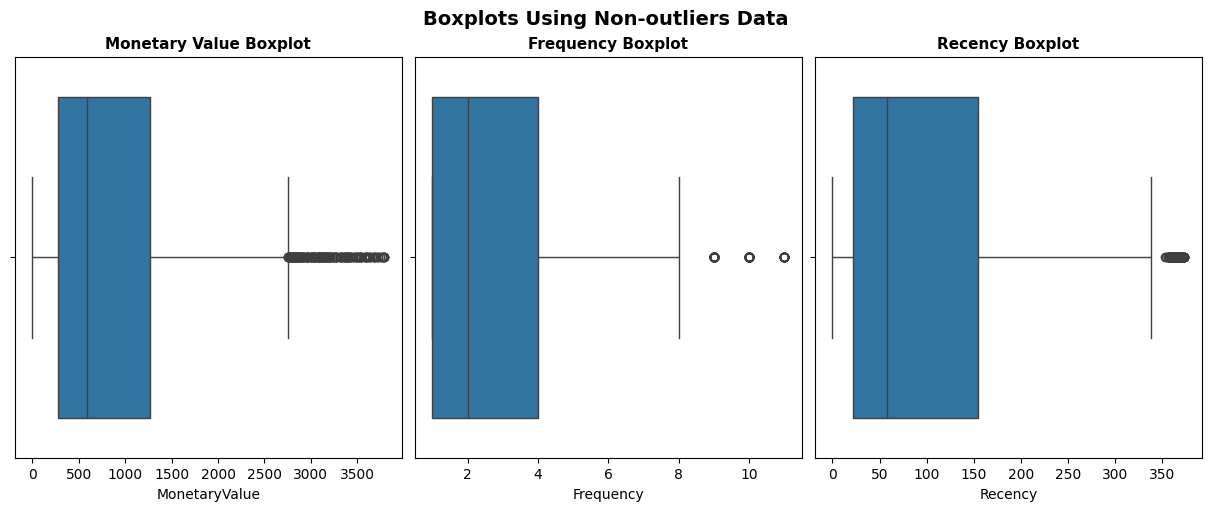

In [51]:
fig, ax = plt.subplots(1, 3, 
                       constrained_layout=True,
                       figsize=(12,5) 
                      )
title_font = {'fontsize': 11,
              'fontweight': 'bold'}

sns.boxplot(x='MonetaryValue',  data=df_non_outliers, ax=ax[0])
ax[0].set_title('Monetary Value Boxplot', fontdict=title_font)

sns.boxplot(x='Frequency',  data=df_non_outliers, ax=ax[1])
ax[1].set_title('Frequency Boxplot', fontdict=title_font)

sns.boxplot(x='Recency',   data=df_non_outliers, ax=ax[2])
ax[2].set_title('Recency Boxplot', fontdict=title_font)

fig.suptitle("Boxplots Using Non-outliers Data", fontsize=14, fontweight='bold')

plt.show()

As we can see there are still outliers if we are interepting the results in strict form, but the x axis is much more toreable now. <br>

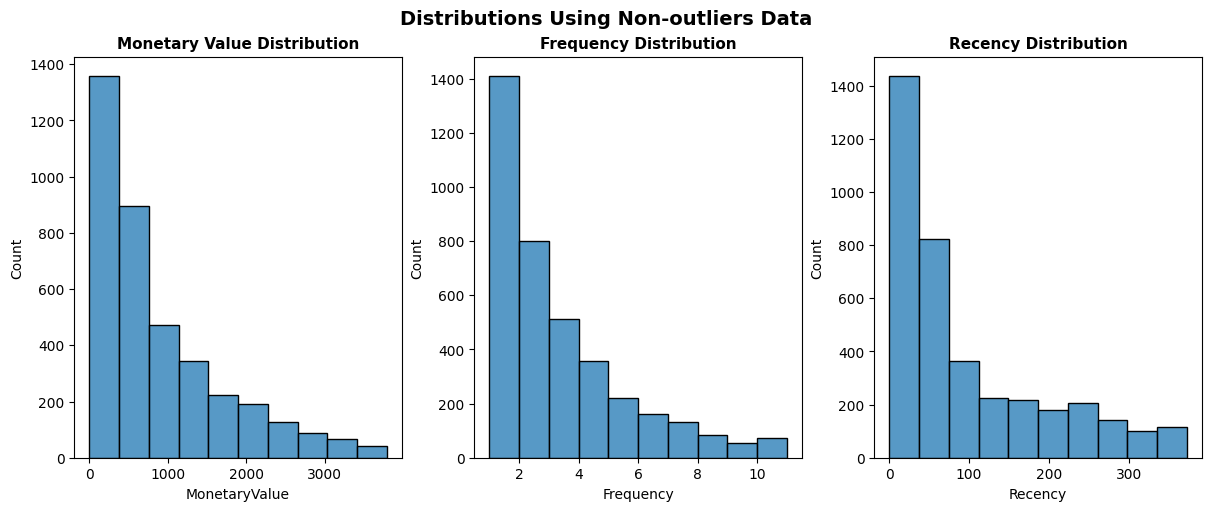

In [52]:
# Visualise distributions of non outliers data

fig, ax = plt.subplots(1, 3, 
                       constrained_layout=True,
                       figsize=(12,5) 
                      )
title_font = {'fontsize': 11,
              'fontweight': 'bold'}

sns.histplot(x='MonetaryValue', bins=10,  data=df_non_outliers, ax=ax[0])
ax[0].set_title('Monetary Value Distribution', fontdict=title_font)

sns.histplot(x='Frequency', bins=10,  data=df_non_outliers, ax=ax[1])
ax[1].set_title('Frequency Distribution', fontdict=title_font)

sns.histplot(x='Recency', bins=10,  data=df_non_outliers, ax=ax[2])
ax[2].set_title('Recency Distribution', fontdict=title_font)

fig.suptitle("Distributions Using Non-outliers Data", fontsize=14, fontweight='bold')

plt.show()

The distributins seems ok also. <br>
Thus we will continue with this dataset.

Next let's explore the data in x,y,z -type of chart and after that let's scale the data so that our KNN algorithm can calclulate the centroids for our clusters effectively without leaning towards high values.

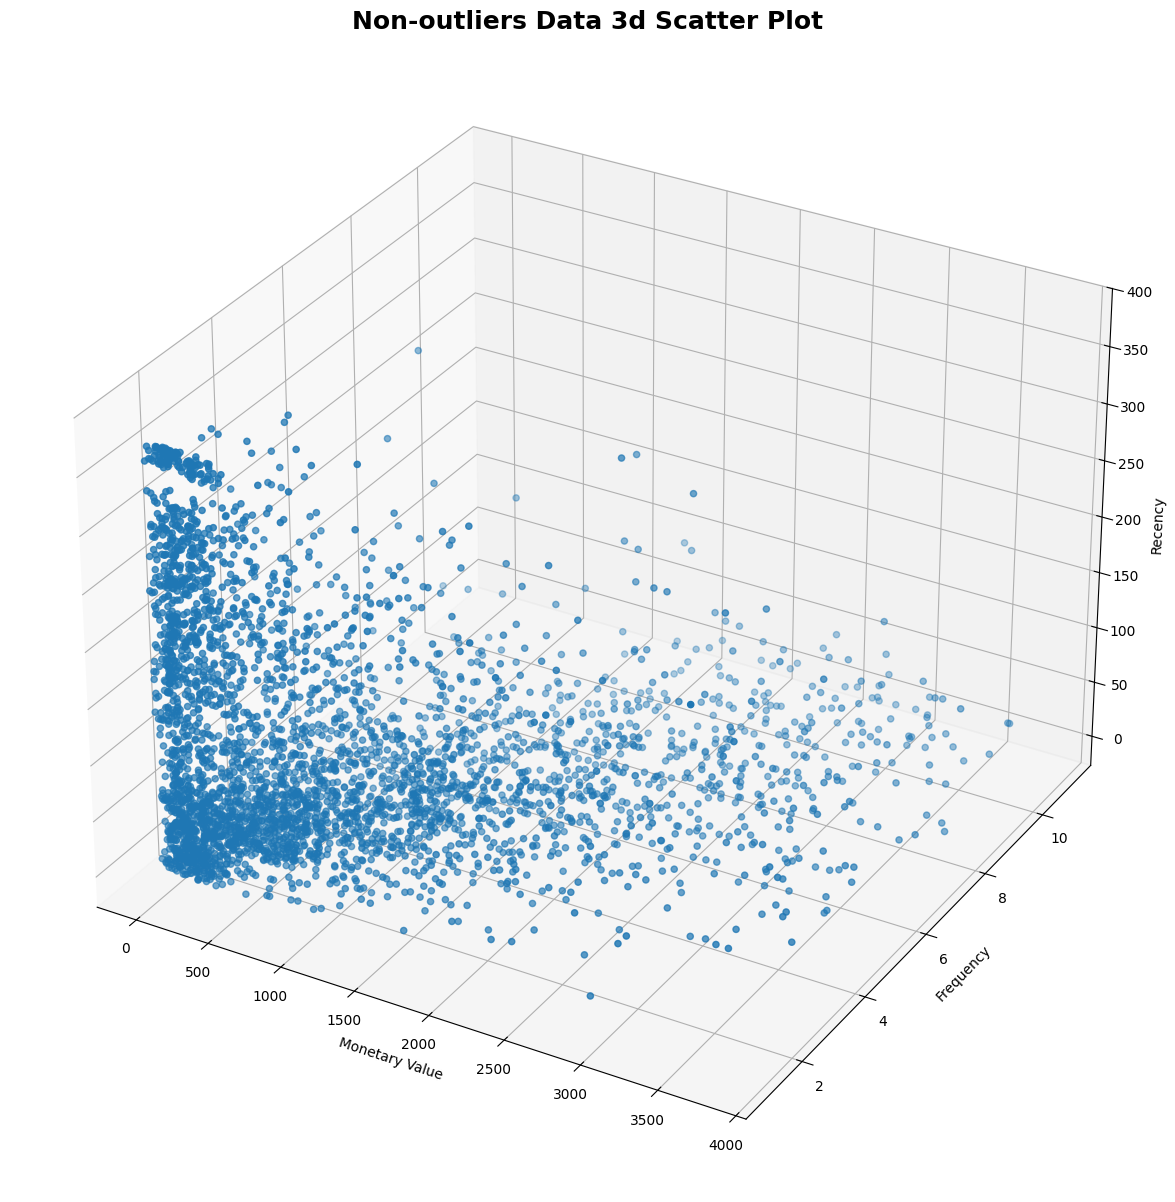

In [53]:
fig, ax = plt.subplots(figsize=(15,15), subplot_kw=dict(projection="3d"))

ax.scatter(df_non_outliers['MonetaryValue'], df_non_outliers['Frequency'], df_non_outliers['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title("Non-outliers Data 3d Scatter Plot", fontsize=18, fontweight='bold')

plt.show()

As we know from previous distribution visualisation, our column distribution are not normally distributed. Thus we will use sklearn MinMaxScaler to normalize DataFrame columns.

In [54]:
mm_scaler = MinMaxScaler()
normalized = mm_scaler.fit_transform(df_non_outliers[['MonetaryValue', 'Frequency', 'Recency']])
df_non_outliers_normalized = pd.DataFrame(normalized, columns=df_non_outliers[['MonetaryValue', 'Frequency', 'Recency']].columns)
df_non_outliers_normalized.head()

MonetaryValue            Frequency              Recency
0                 0.04                 0.10                 0.44
1                 0.35                 0.10                 0.01
2                 0.06                 0.00                 0.20
3                 0.59                 0.10                 0.11
4                 0.08                 0.00                 0.03

Let's replot the previous plot with normalized values:

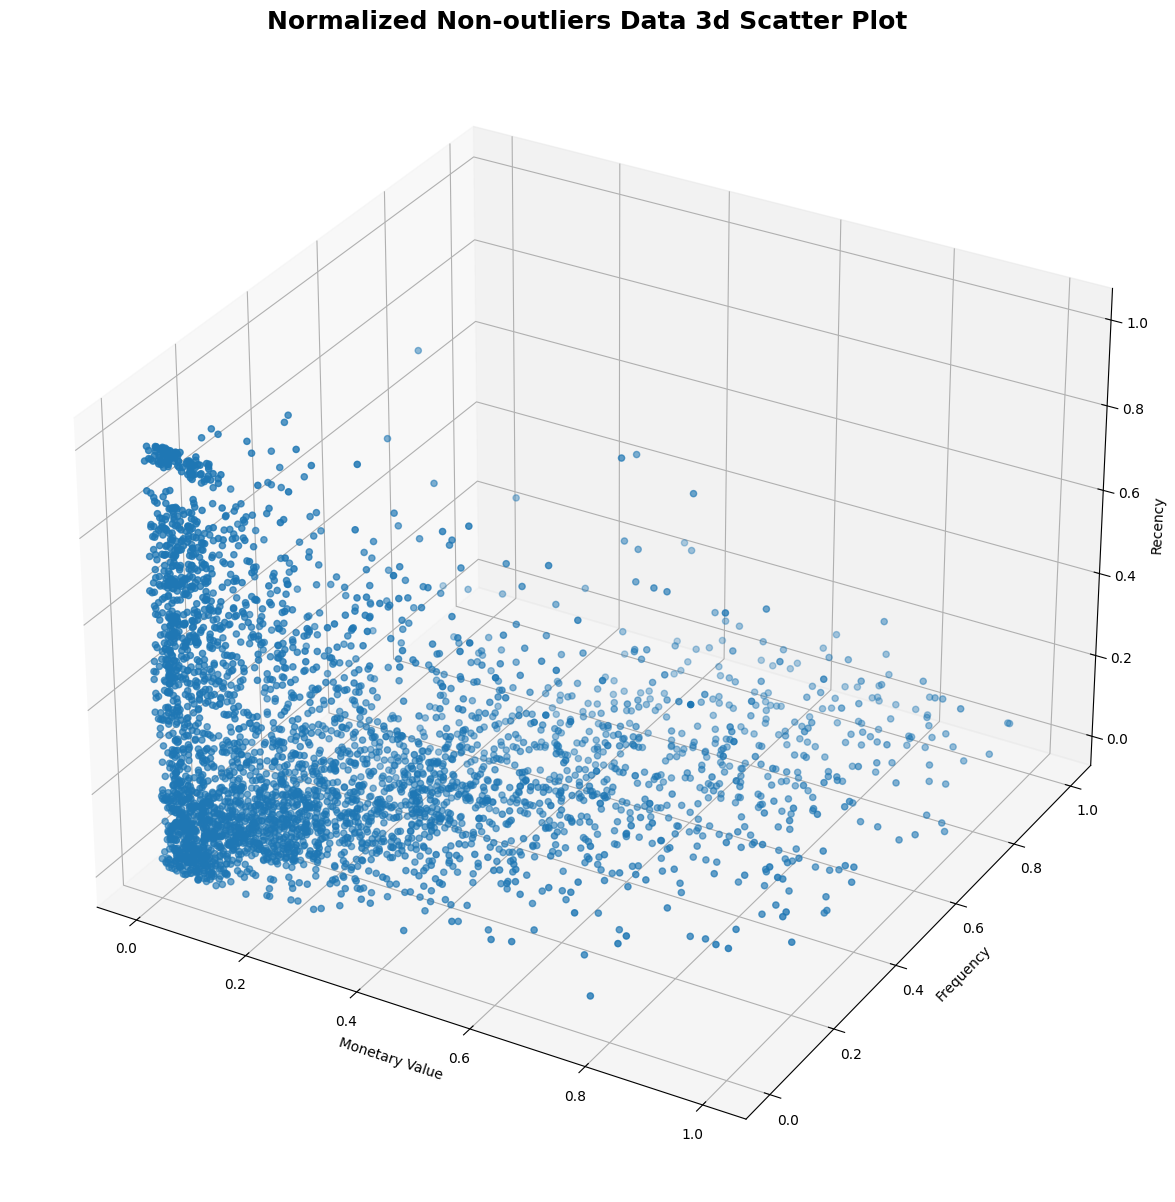

In [55]:
fig, ax = plt.subplots(figsize=(15,15), subplot_kw=dict(projection="3d"))

ax.scatter(df_non_outliers_normalized['MonetaryValue'], df_non_outliers_normalized['Frequency'], df_non_outliers_normalized['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title("Normalized Non-outliers Data 3d Scatter Plot", fontsize=18, fontweight='bold')

plt.show()

As we can see, the shape plot is equal with the previous plot, the exact values are normalized.

# Clustering - K-Means Clustering

Let's try to find number of clusters using the elbow method.

In [56]:
data = df_non_outliers_normalized

inertia_values = []
silhouette_scores = []

for k in range(2,16):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=2024, max_iter=1000)
    kmeans.fit(data)
    cluster_labels = kmeans.fit_predict(data)
    sil_score = silhouette_score(data, cluster_labels)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(sil_score)

C:\Users\SPE2\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\SPE2\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


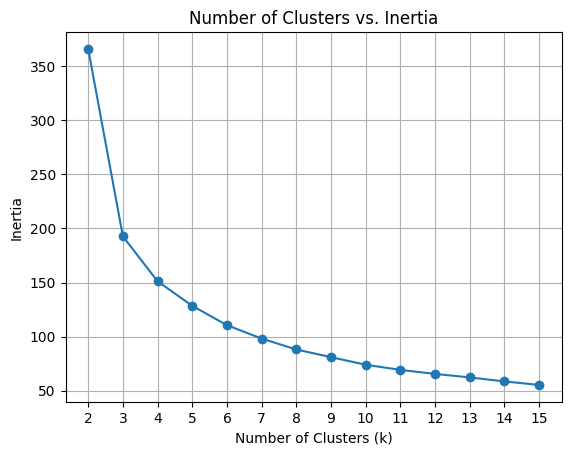

In [57]:
inertia_series = pd.Series(inertia_values, index=range(2,16))

inertia_series.plot(marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Number of Clusters vs. Inertia')
plt.xticks(range(2,16))
plt.grid()
plt.show();

The elbow seems to be at 3 clusters. However the inertia is still significantly reduced when moving to 4 clusters. <br>
So we do some more work to find out the number of clusters by calculating silhouette score, because it is well suitable, when we are working with unsupervised learning clusters <br>
i.e. we don't have clusters given beforehand. 

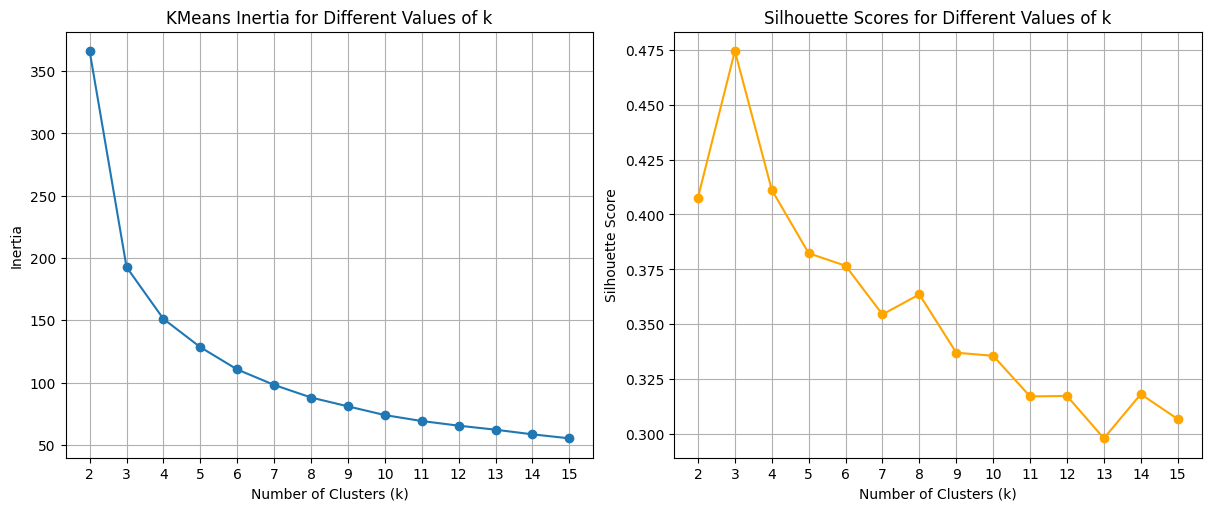

In [58]:
k_values = range(2, 16)

fig, ax = plt.subplots(1, 2, 
                       constrained_layout=True,
                       figsize=(12,5) 
                      )


ax[0].plot(k_values, inertia_values, marker='o')
ax[0].set_title('KMeans Inertia for Different Values of k')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Inertia')
ax[0].set_xticks(k_values)
ax[0].grid(True)


ax[1].plot(k_values, silhouette_scores, marker='o', color='orange')
ax[1].set_title('Silhouette Scores for Different Values of k')
ax[1].set_xlabel('Number of Clusters (k)')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_xticks(k_values)
ax[1].grid(True)


plt.show()

It seems that with 3 clusters we got significantly higher silhouette score. <br>
On the other hand moving from 3 to 4 cluster reduces inertia quite a lot. <br>
This is the reason I want to test the shape and area of the clusters on 3d map before deciding if I want to go with 3 or 4 clusters.

In [59]:
kmeans3 = KMeans(n_clusters=3, random_state=2024, max_iter=1000)
kmeans4 = KMeans(n_clusters=4, random_state=2024, max_iter=1000)

cluster_labels3 = kmeans3.fit_predict(df_non_outliers_normalized)
cluster_labels4 = kmeans4.fit_predict(df_non_outliers_normalized)

In [60]:
df_non_outliers = df_non_outliers.copy()
df_non_outliers['Cluster3'] = cluster_labels3
df_non_outliers['Cluster4'] = cluster_labels4

df_non_outliers.head()

Customer ID        MonetaryValue  Frequency     LastInvoiceDate  Recency  \
0        12346               169.36          2 2010-06-28 13:53:00      164   
1        12347              1323.32          2 2010-12-07 14:57:00        2   
2        12348               221.16          1 2010-09-27 14:59:00       73   
3        12349              2221.14          2 2010-10-28 08:23:00       42   
4        12351               300.93          1 2010-11-29 15:23:00       10   

   Cluster3  Cluster4  
0         0         0  
1         1         3  
2         1         1  
3         2         3  
4         1         1

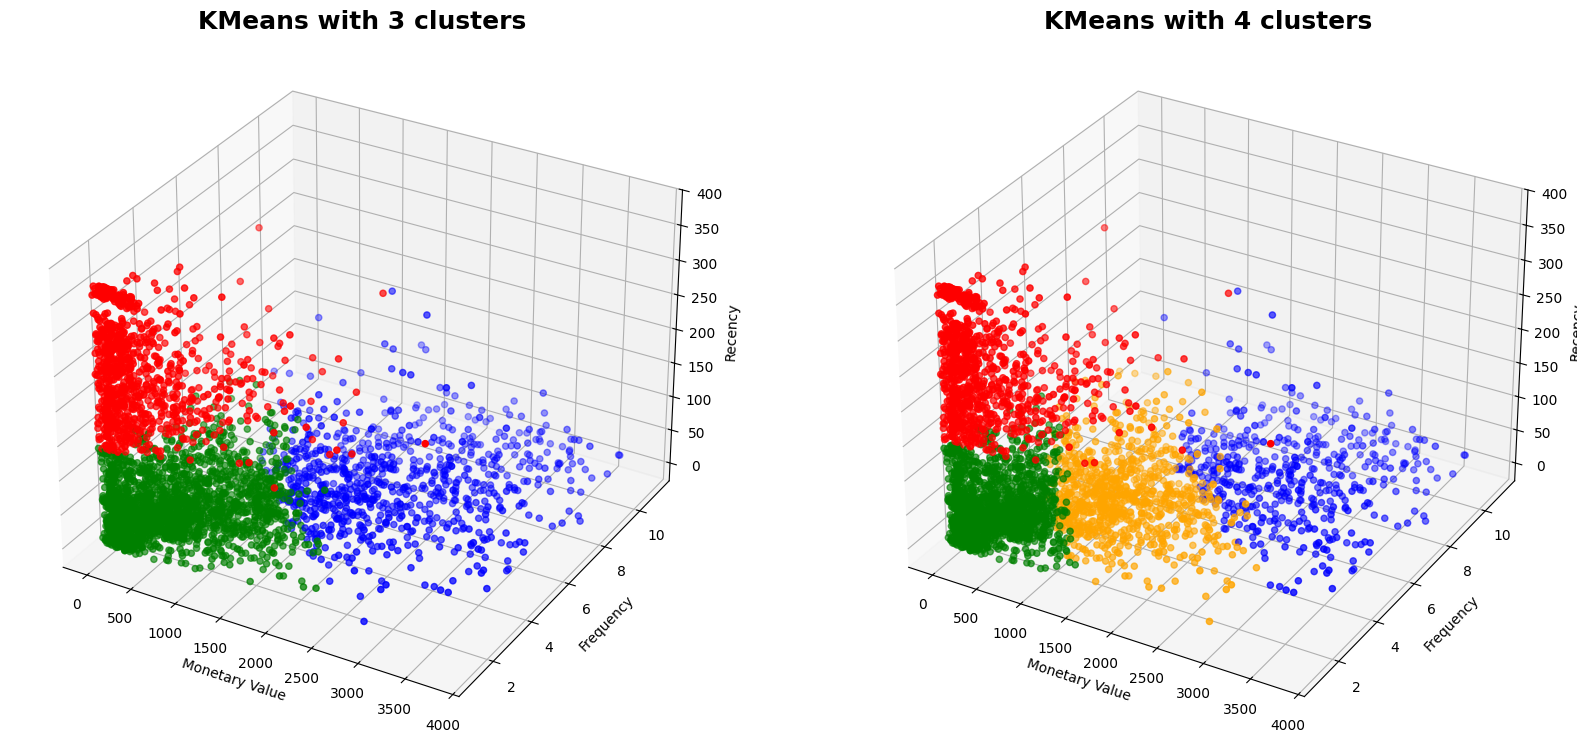

In [61]:
fig, ax = plt.subplots(1,2, figsize=(20,20), subplot_kw=dict(projection="3d"))

cluster_colors = {0: 'red',
                  1: 'green',
                  2: 'blue',
                  3: 'orange'
                 }

colors3 = df_non_outliers['Cluster3'].map(cluster_colors)
colors4 = df_non_outliers['Cluster4'].map(cluster_colors)

ax[0].scatter(df_non_outliers['MonetaryValue'], df_non_outliers['Frequency'], df_non_outliers['Recency'], c=colors3)
ax[0].set_xlabel('Monetary Value')
ax[0].set_ylabel('Frequency')
ax[0].set_zlabel('Recency')
ax[0].set_title('KMeans with 3 clusters', fontsize=18, fontweight='bold')

ax[1].scatter(df_non_outliers['MonetaryValue'], df_non_outliers['Frequency'], df_non_outliers['Recency'], c=colors4)
ax[1].set_xlabel('Monetary Value')
ax[1].set_ylabel('Frequency')
ax[1].set_zlabel('Recency')
ax[1].set_title('KMeans with 4 clusters', fontsize=18, fontweight='bold')

plt.show()

When interpreting the results I think the 4 cluster choice is better. On 3 clusters we have "too wide scatter" among "green" and "blue" clusters. <br>
With 4 clusters it is more intuitive to explain the clusters.<br>
Blue = High frequency, Low Recency, High monetary value customers <br>
Orange = Mid range customers <br>
Green = Lower monetary value, Lower Frequency, Lower Recency (recentyly purchased, but have not purchased many times and total amount quite low) <br>
Red = High Recency (have not bought recently ), lower montary value, average frequency

In [62]:
df_non_outliers.drop('Cluster3', axis=1, inplace=True)
df_non_outliers.rename(columns=({'Cluster4': 'Cluster'}), inplace=True)
df_non_outliers.head()

Customer ID        MonetaryValue  Frequency     LastInvoiceDate  Recency  \
0        12346               169.36          2 2010-06-28 13:53:00      164   
1        12347              1323.32          2 2010-12-07 14:57:00        2   
2        12348               221.16          1 2010-09-27 14:59:00       73   
3        12349              2221.14          2 2010-10-28 08:23:00       42   
4        12351               300.93          1 2010-11-29 15:23:00       10   

   Cluster  
0        0  
1        3  
2        1  
3        3  
4        1

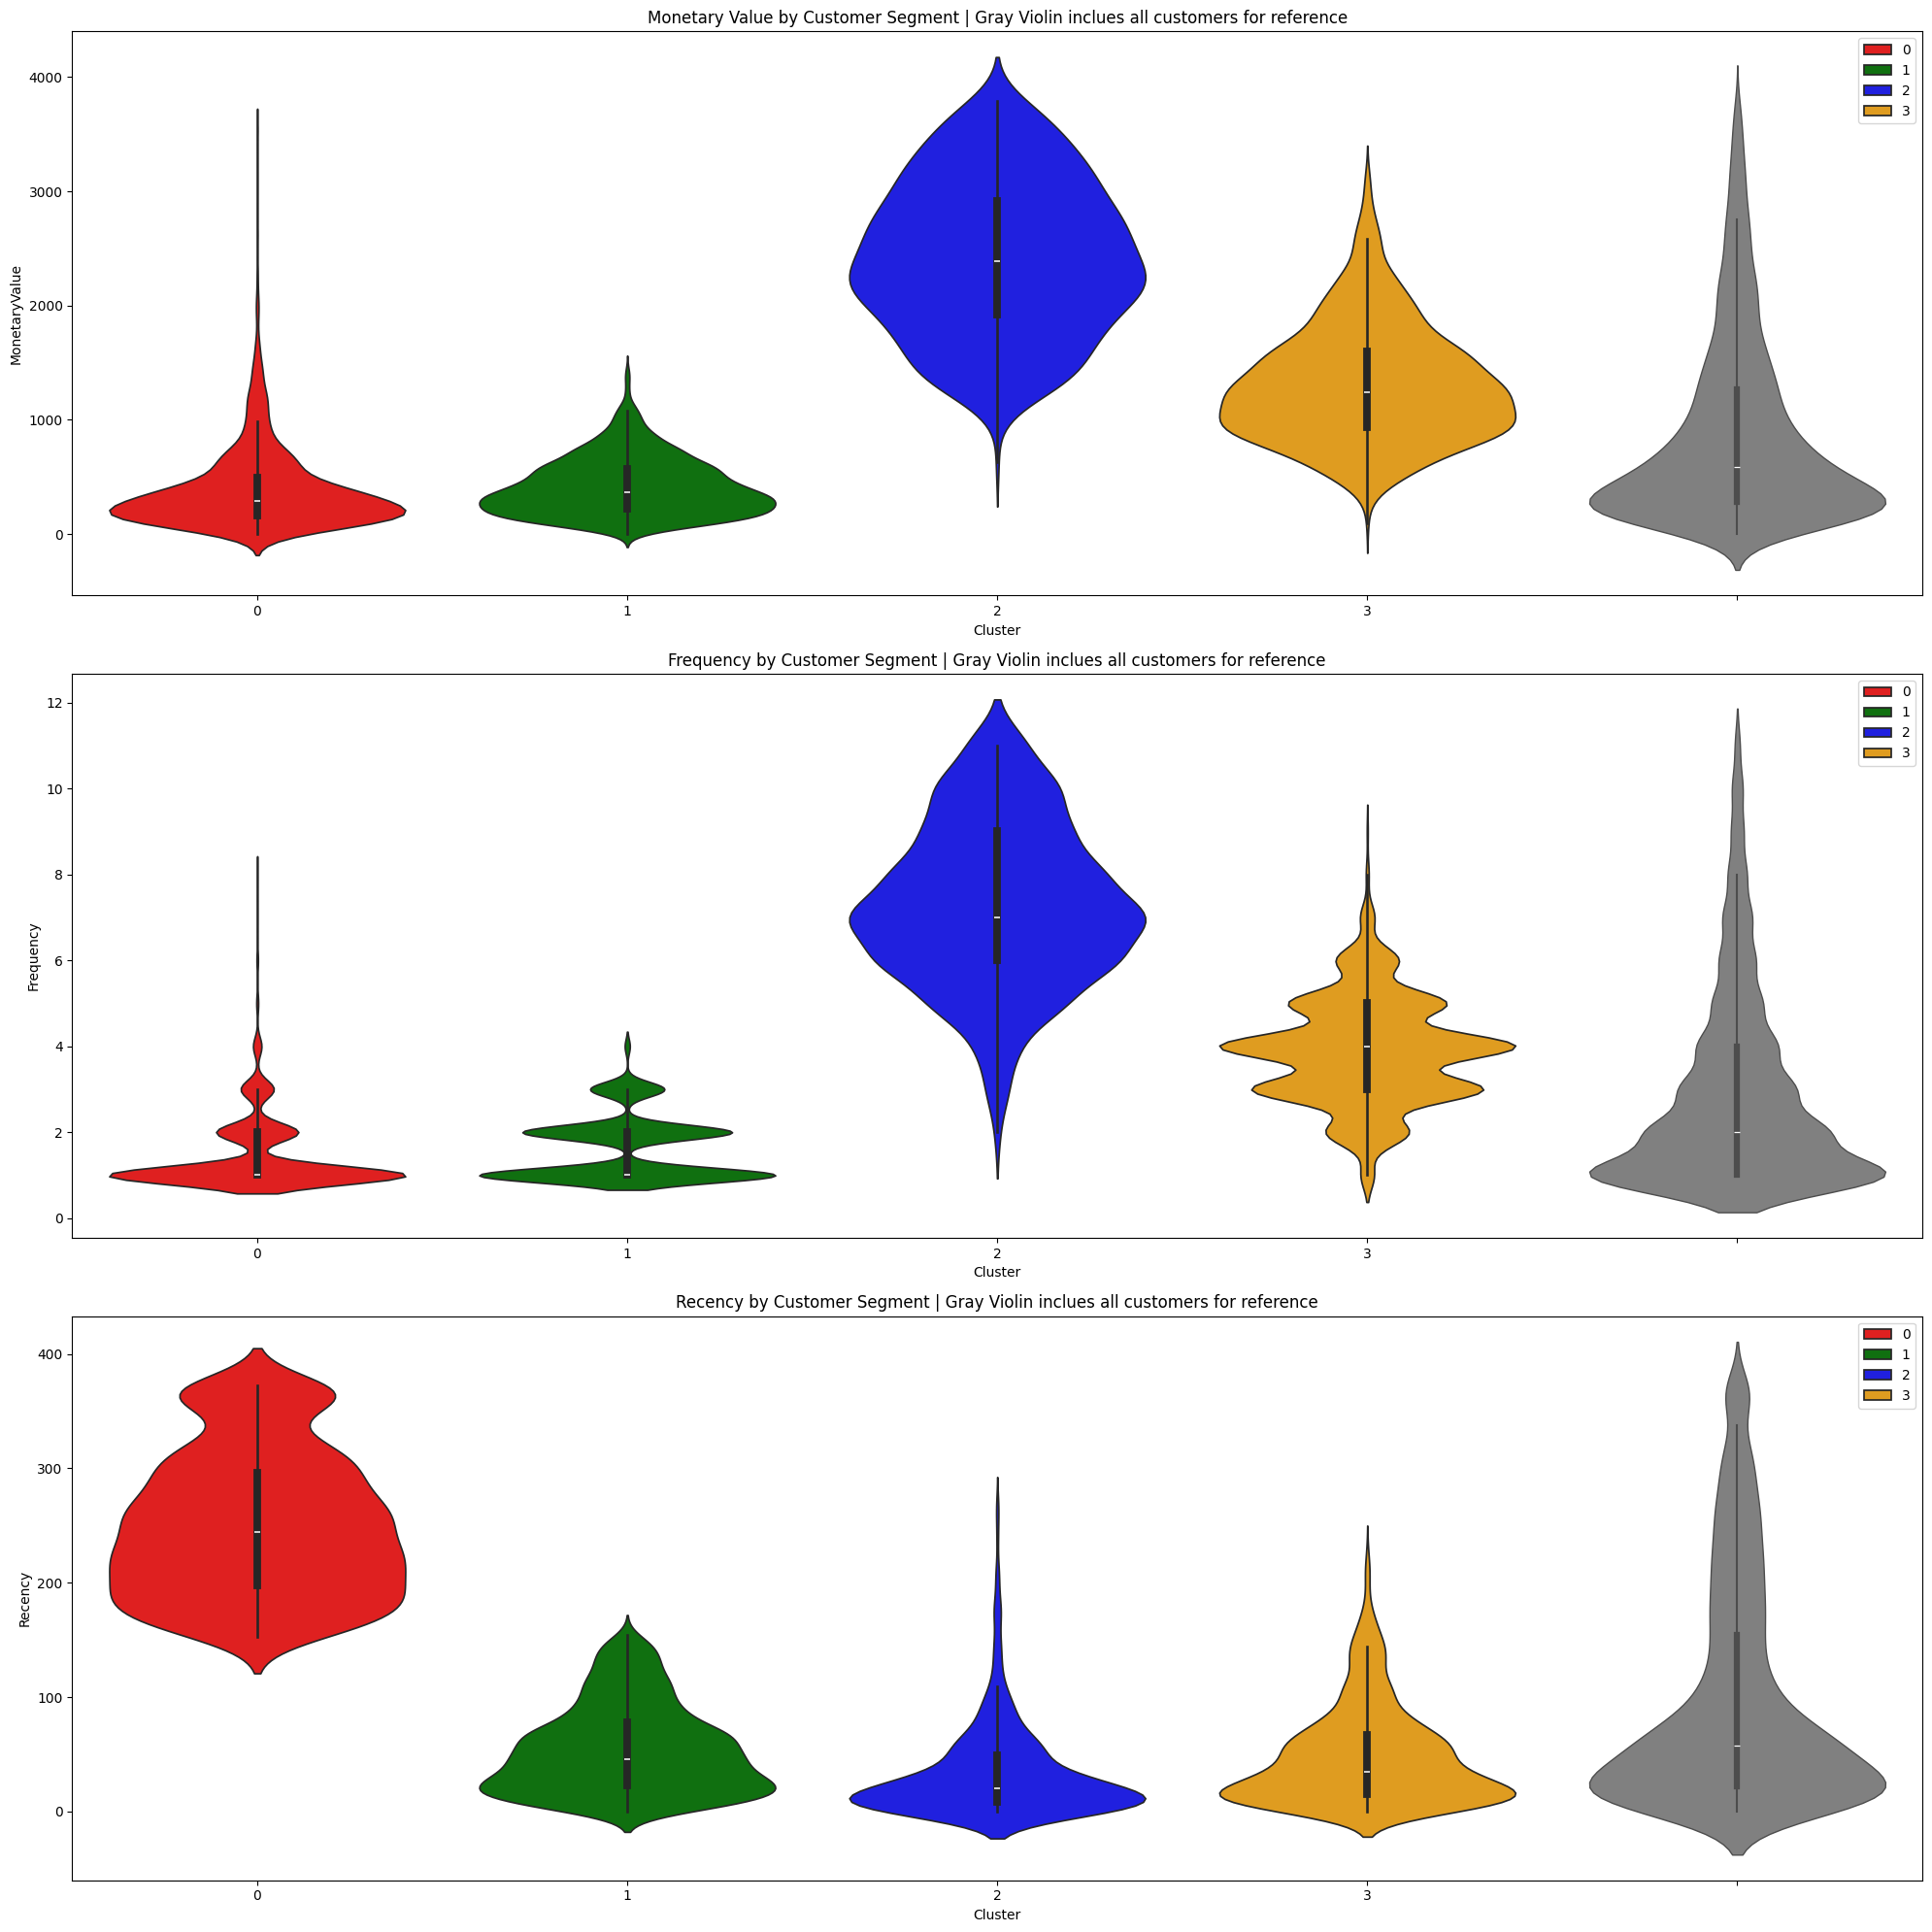

In [63]:
fig, ax = plt.subplots(3,1, figsize=(20,20))

sns.violinplot(x=df_non_outliers['Cluster'], y=df_non_outliers['MonetaryValue'], hue=df_non_outliers['Cluster'], palette=cluster_colors, ax=ax[0])
sns.violinplot(y=df_non_outliers['MonetaryValue'], color='gray', linewidth=1.0, ax=ax[0])
ax[0].set_title('Monetary Value by Customer Segment | Gray Violin inclues all customers for reference')

sns.violinplot(x=df_non_outliers['Cluster'], y=df_non_outliers['Frequency'], hue=df_non_outliers['Cluster'], palette=cluster_colors, ax=ax[1])
sns.violinplot(y=df_non_outliers['Frequency'], color='gray', linewidth=1.0, ax=ax[1])
ax[1].set_title('Frequency by Customer Segment | Gray Violin inclues all customers for reference')

sns.violinplot(x=df_non_outliers['Cluster'], y=df_non_outliers['Recency'], hue=df_non_outliers['Cluster'], palette=cluster_colors, ax=ax[2])
sns.violinplot(y=df_non_outliers['Recency'], color='gray', linewidth=1.0, ax=ax[2])
ax[2].set_title('Recency by Customer Segment | Gray Violin inclues all customers for reference')


plt.tight_layout()
plt.show();

The violin plot gives us even more information in addition whatwe already got from previous 3d scatter plot. The results from violin plot kind of confirms the initial info we got from the 3d scatter plot.<br>

Blue = High frequency, Low Recency, High monetary value customers <br>
Orange = Mid range customers <br>
Green = Lower monetary value, Lower Frequency, Lower Recency (recentyly purchased, but have not purchased many times and total amount quite low) <br>
Red = High Recency (have not bought recently ), lower montary value, average frequency 

Let's examine these a bit further with radar chart and traditional bar chart, so that we can interpret the final cluster definitions.

In [64]:
# prepare data for radar plot
df_non_outliers_radar = df_non_outliers.groupby('Cluster').agg(MonetaryValue = ('MonetaryValue', 'mean'),
                                    Frequency = ('Frequency', 'mean'),
                                      Recency = ('Recency', 'mean'))


In [65]:
# prepare data for radar plot

scaler = MinMaxScaler()

df_non_outliers_radar_scaled = df_non_outliers_radar
df_non_outliers_radar_scaled[['MonetaryValue', 'Frequency', 'Recency']] = scaler.fit_transform(df_non_outliers_radar_scaled[['MonetaryValue', 'Frequency', 'Recency']])


df_non_outliers_radar_melted = df_non_outliers_radar_scaled.reset_index().melt(id_vars='Cluster', var_name='Metric', value_name='Value')


In [66]:
# plot the radar plot using plotly library - Visualise cluster centers i.e. cluster means 

cluster_colors = {0: 'red',
                  1: 'green',
                  2: 'blue',
                  3: 'orange'
                 }

colors = df_non_outliers_radar_melted['Cluster'].map(cluster_colors)


fig = px.line_polar(df_non_outliers_radar_melted, r='Value', theta='Metric', color='Cluster', line_close=True)

fig.update_layout(
    width=1000,  
    height=1000,  
    title="Radar Chart for Clusters"
)


for cluster, color in cluster_colors.items():
    fig.for_each_trace(
        lambda trace: trace.update(line_color=color) if trace.name == str(cluster) else ()
    )

fig.show()

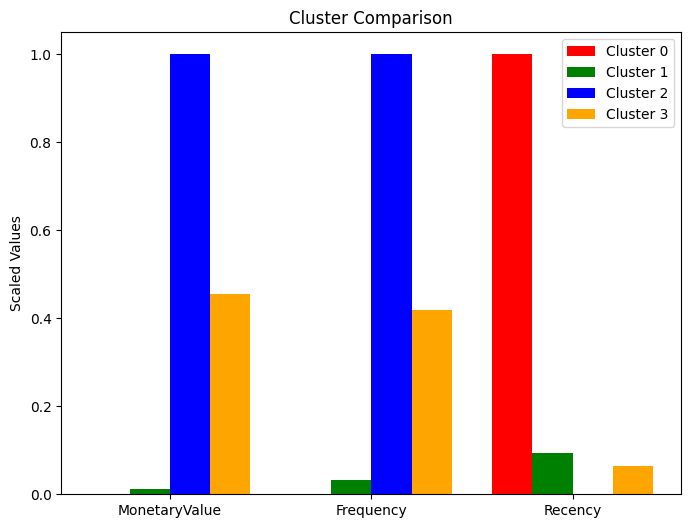

In [67]:
# Visualise cluster centers i.e. cluster means on bar charts

categories = df_non_outliers_radar_scaled.columns
clusters = df_non_outliers_radar_scaled.index
num_clusters = len(clusters)
bar_width = 0.2


x = np.arange(len(categories))


fig, ax = plt.subplots(figsize=(8, 6))

for i, cluster in enumerate(clusters):
    ax.bar(x + i * bar_width, df_non_outliers_radar_scaled.loc[cluster], width=bar_width, label=f'Cluster {cluster}', color=cluster_colors[cluster])


ax.set_xticks(x + bar_width * (num_clusters - 1) / 2)
ax.set_xticklabels(categories)
ax.set_ylabel('Scaled Values')
ax.set_title('Cluster Comparison')
ax.legend()

plt.show()


### Cluster analysis outcome | Non-outliers 

Cluster 0: Red - "Win Back" <br>

* Who They Are: These are low-value, occasional buyers who haven't shopped with us in a while. They may be one-time buyers who dropped off after their initial purchase.
* Next Steps: Bring them back! Let’s run targeted marketing campaigns, offer special discounts, or send friendly reminders to encourage them to shop again. <br>

Cluster 1: Green - "Grow Together" <br>

* Who They Are: These are newer or less active customers who recently made a purchase. They may need a little more attention to become regular shoppers.
* Next Steps: Focus on relationship building. We can provide excellent customer service and offer incentives to encourage more frequent purchases and loyalty. <br>

Cluster 2: Blue - "Celebrate Loyalty" <br>

* Who They Are: Our top customers! They buy often, spend a lot, and are highly engaged. These are our most loyal shoppers.
* Next Steps: Show them they’re valued. A strong loyalty program, exclusive offers, and special recognition will help keep these customers happy and connected to our brand.

Cluster 3: Orange - "Keep Close" <br>

* Who They Are: High-value customers who buy regularly, though they might not have made a recent purchase. They’re familiar with us, but we want to keep them around.
* Next Steps: Retention is key here. Let’s consider loyalty programs, personalized offers, and consistent engagement to keep them coming back. <br>



# Outliers -> Let's make outlier clusters next

In [68]:
# Some of the Monetary and Frequency outliers will overlap each other. Let's make sure that there are no duplicates.

overlap_indexes = df_monetary_outliers.index.intersection(df_frequency_outliers.index)
df_monetary_only_outliers = df_monetary_outliers.drop(overlap_indexes)
df_frequency_only_outliers = df_frequency_outliers.drop(overlap_indexes)
df_monetary_and_frequency_outliers = df_monetary_outliers.loc[overlap_indexes]

df_monetary_only_outliers['Cluster'] = -1
df_frequency_only_outliers['Cluster'] = -2
df_monetary_and_frequency_outliers['Cluster'] = -3

df_outlier_clusters = pd.concat([df_monetary_only_outliers, df_frequency_only_outliers, df_monetary_and_frequency_outliers])
df_outlier_clusters

Customer ID        MonetaryValue  Frequency     LastInvoiceDate  \
9           12357             11229.99          1 2010-11-16 10:05:00   
25          12380              4782.84          4 2010-08-31 14:54:00   
42          12409             12346.62          4 2010-10-15 10:24:00   
48          12415             19468.84          4 2010-11-29 15:07:00   
61          12431              4145.52         11 2010-12-01 10:03:00   
...           ...                  ...        ...                 ...   
4235        18223              7516.31         12 2010-11-17 12:20:00   
4236        18225              7545.14         15 2010-12-09 15:46:00   
4237        18226              6650.83         15 2010-11-26 15:51:00   
4241        18231              4791.80         23 2010-10-29 14:17:00   
4262        18260              7318.91         17 2010-11-30 12:25:00   

      Recency  Cluster  
9          23       -1  
25        100       -1  
42         55       -1  
48         10       -1  
61          8       -1  
...       ...      ...  
4235       22       -3  
4236        0       -3  
4237       13       -3  
4241       41       -3  
4262        9       -3  

[476 rows x 6 columns]

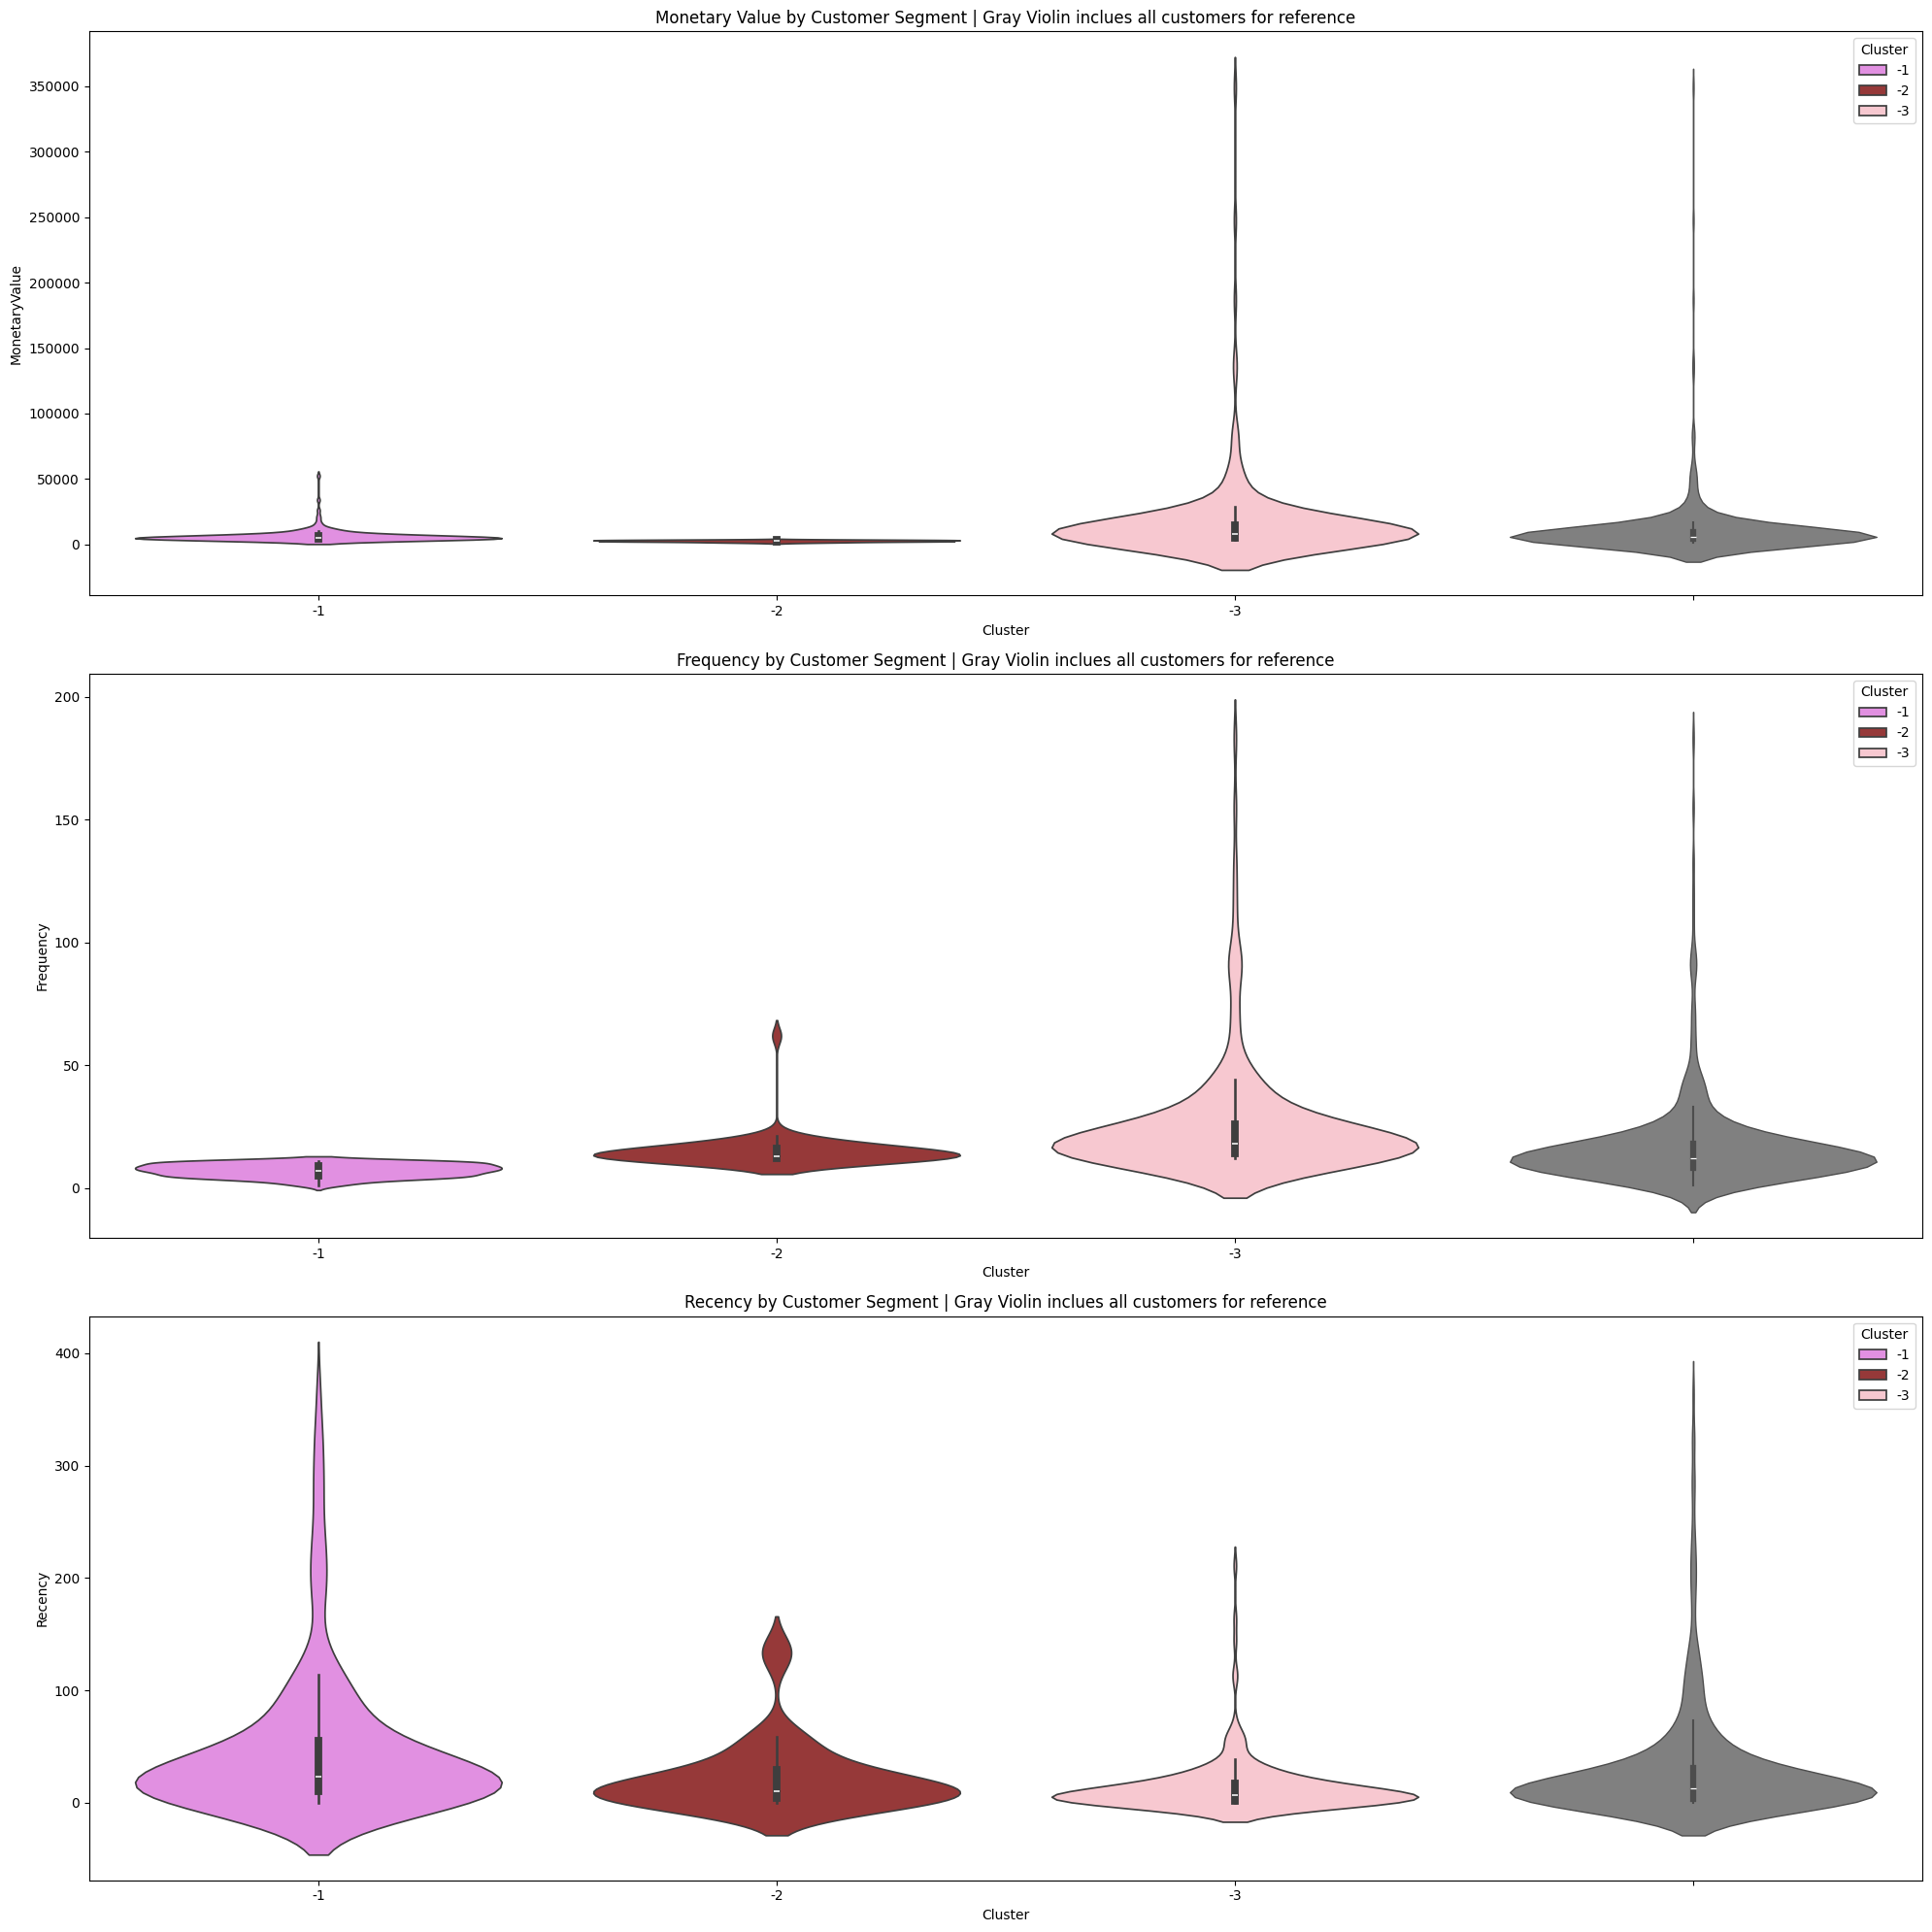

In [69]:
# Explore Outlier clusters with violin plot

cluster_colors_outliers = {-1: 'violet',
                  -2: 'brown',
                  -3: 'pink'
                 }


fig, ax = plt.subplots(3,1, figsize=(20,20))

cluster_order = sorted(df_outlier_clusters['Cluster'].unique(), reverse=True)

sns.violinplot(x=df_outlier_clusters['Cluster'], y=df_outlier_clusters['MonetaryValue'], hue=df_outlier_clusters['Cluster'], palette=cluster_colors_outliers, ax=ax[0], order=cluster_order)
sns.violinplot(y=df_outlier_clusters['MonetaryValue'], color='gray', linewidth=1.0, ax=ax[0])
ax[0].set_title('Monetary Value by Customer Segment | Gray Violin inclues all customers for reference')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[::-1], labels[::-1], title="Cluster")


sns.violinplot(x=df_outlier_clusters['Cluster'], y=df_outlier_clusters['Frequency'], hue=df_outlier_clusters['Cluster'], palette=cluster_colors_outliers, ax=ax[1], order=cluster_order)
sns.violinplot(y=df_outlier_clusters['Frequency'], color='gray', linewidth=1.0, ax=ax[1])
ax[1].set_title('Frequency by Customer Segment | Gray Violin inclues all customers for reference')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[::-1], labels[::-1], title="Cluster")


sns.violinplot(x=df_outlier_clusters['Cluster'], y=df_outlier_clusters['Recency'], hue=df_outlier_clusters['Cluster'], palette=cluster_colors_outliers, ax=ax[2], order=cluster_order)
sns.violinplot(y=df_outlier_clusters['Recency'], color='gray', linewidth=1.0, ax=ax[2])
ax[2].set_title('Recency by Customer Segment | Gray Violin inclues all customers for reference')
handles, labels = ax[2].get_legend_handles_labels()
ax[2].legend(handles[::-1], labels[::-1], title="Cluster")


plt.tight_layout()
plt.show();

In [70]:
# Explore Outlier cluster centers with Radar plot

df_outlier_clusters_radar = df_outlier_clusters.groupby('Cluster').agg(MonetaryValue = ('MonetaryValue', 'mean'),
                                    Frequency = ('Frequency', 'mean'),
                                      Recency = ('Recency', 'mean'))


scaler = MinMaxScaler()

df_outlier_clusters_radar_scaled = df_outlier_clusters_radar
df_outlier_clusters_radar_scaled[['MonetaryValue', 'Frequency', 'Recency']] = scaler.fit_transform(df_outlier_clusters_radar_scaled[['MonetaryValue', 'Frequency', 'Recency']])


df_outlier_clusters_radar_melted = df_outlier_clusters_radar_scaled.reset_index().melt(id_vars='Cluster', var_name='Metric', value_name='Value')


colors = df_outlier_clusters_radar_melted['Cluster'].map(cluster_colors_outliers)


fig = px.line_polar(df_outlier_clusters_radar_melted, r='Value', theta='Metric', color='Cluster', line_close=True)

fig.update_layout(
    width=1000,  
    height=1000,  
    title="Radar Chart for Clusters",
    legend_traceorder="reversed"
)


for cluster, color in cluster_colors.items():
    fig.for_each_trace(
        lambda trace: trace.update(line_color=color) if trace.name == str(cluster) else ()
    )

fig.show()


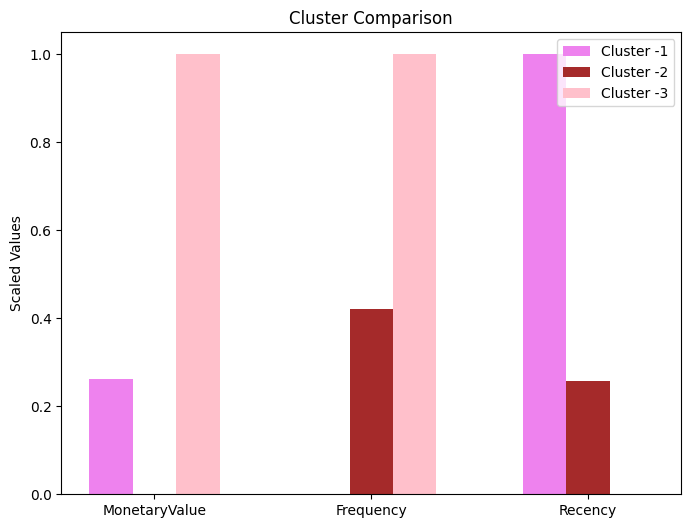

In [71]:
# Explore Outlier cluster centers with Bar plot

categories = df_outlier_clusters_radar_scaled.columns  
clusters = sorted(df_outlier_clusters_radar_scaled.index, reverse=True)  
num_clusters = len(clusters)
bar_width = 0.2

x = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(8, 6))

for i, cluster in enumerate(clusters):
    ax.bar(x + i * bar_width, df_outlier_clusters_radar_scaled.loc[cluster], 
           width=bar_width, label=f'Cluster {cluster}', color=cluster_colors_outliers[cluster])

# Set x-ticks and labels
ax.set_xticks(x + bar_width * (num_clusters - 1) / 2)
ax.set_xticklabels(categories)  
ax.set_ylabel('Scaled Values')
ax.set_title('Cluster Comparison')


ax.legend()  
plt.show()


### Cluster analysis outcome | Outliers 

Cluster -1: Violet (Monetary Outliers) - "Pamper Them" <br>
* Who They Are: High spenders, but they don’t shop all that often. When they do, they go big on their purchases.
* Next Steps: Keep them loyal with special, personalized offers or luxury perks that make the most of their high spending habits.

Cluster -2: Brown (Frequent Outliers) - "Add Value" <br>
* Who They Are: These are frequent buyers who spend a bit less each time but are very engaged. They’re reliable customers who might be open to a little extra.
* Next Steps: Introduce loyalty perks or bundle deals to encourage higher spending per visit and reward their steady shopping.

Cluster -3: Pink (Monetary & Frequent Outliers) - "Make Them Feel VIP" <br>
* Who They Are: The absolute top-tier! They’re frequent buyers and big spenders - the most valuable customers who deserve extra care.
* Next steps: Create VIP programs or exclusive offers to keep them loyal and ensure they feel truly valued.

In [72]:
cluster_labels = {
    0: "Win Back",
    1: "Grow Together",
    2: "Celebrate Loyalty",
    3: "Keep Close",
    -1: "Pamper Them",
    -2: "Add Value",
    -3: "Make Them Feel VIP"
}

In [73]:
df_all_data = pd.concat([df_non_outliers, df_outlier_clusters])

In [74]:
# Map Cluster Labers to the DataFrame which includes all the data

df_all_data['ClusterLabel'] = df_all_data['Cluster'].map(cluster_labels)

In [75]:
df_all_data

Customer ID        MonetaryValue  Frequency     LastInvoiceDate  \
0           12346               169.36          2 2010-06-28 13:53:00   
1           12347              1323.32          2 2010-12-07 14:57:00   
2           12348               221.16          1 2010-09-27 14:59:00   
3           12349              2221.14          2 2010-10-28 08:23:00   
4           12351               300.93          1 2010-11-29 15:23:00   
...           ...                  ...        ...                 ...   
4235        18223              7516.31         12 2010-11-17 12:20:00   
4236        18225              7545.14         15 2010-12-09 15:46:00   
4237        18226              6650.83         15 2010-11-26 15:51:00   
4241        18231              4791.80         23 2010-10-29 14:17:00   
4262        18260              7318.91         17 2010-11-30 12:25:00   

      Recency  Cluster        ClusterLabel  
0         164        0            Win Back  
1           2        3          Keep Close  
2          73        1       Grow Together  
3          42        3          Keep Close  
4          10        1       Grow Together  
...       ...      ...                 ...  
4235       22       -3  Make Them Feel VIP  
4236        0       -3  Make Them Feel VIP  
4237       13       -3  Make Them Feel VIP  
4241       41       -3  Make Them Feel VIP  
4262        9       -3  Make Them Feel VIP  

[4285 rows x 7 columns]

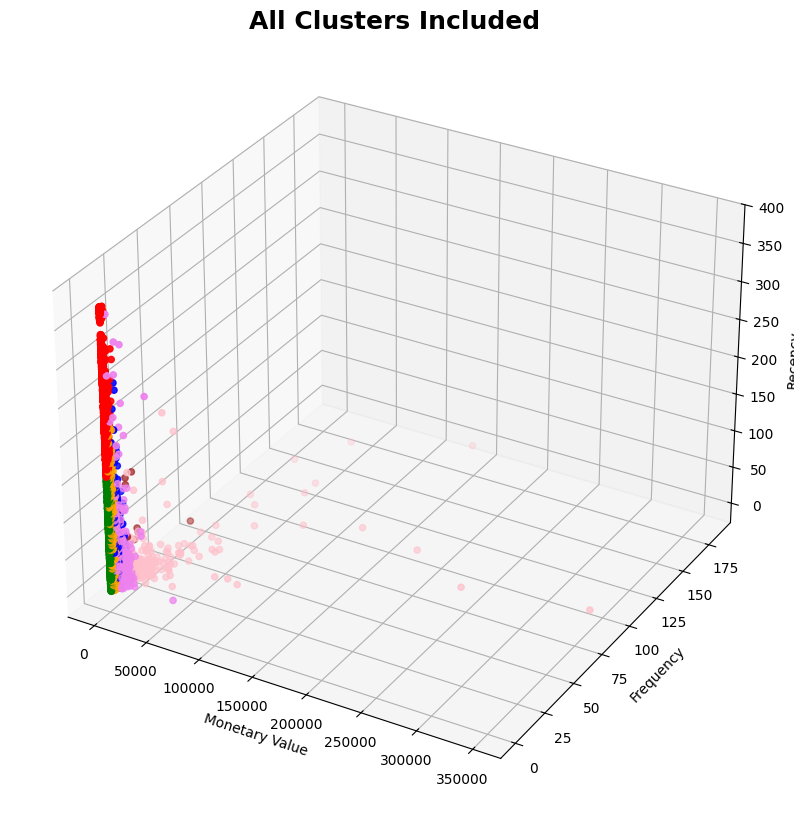

In [76]:
# Visualise all data to 3d map for fun to see crazy outliers

fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(projection="3d"))

cluster_colors_all = {0: 'red',
                  1: 'green',
                  2: 'blue',
                  3: 'orange',
                  -1: 'violet',
                  -2: 'brown',
                  -3: 'pink'
                 }

colors = df_all_data['Cluster'].map(cluster_colors_all)

ax.scatter(df_all_data['MonetaryValue'], df_all_data['Frequency'], df_all_data['Recency'], c=colors)
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('All Clusters Included', fontsize=18, fontweight='bold')

plt.show()

The "Make them feel VIP" -cluster is so outrageous, that it is challenging to get a grip of the rest. This chart is presented "just for fun".

# Let's then visualize a summary of all clusters

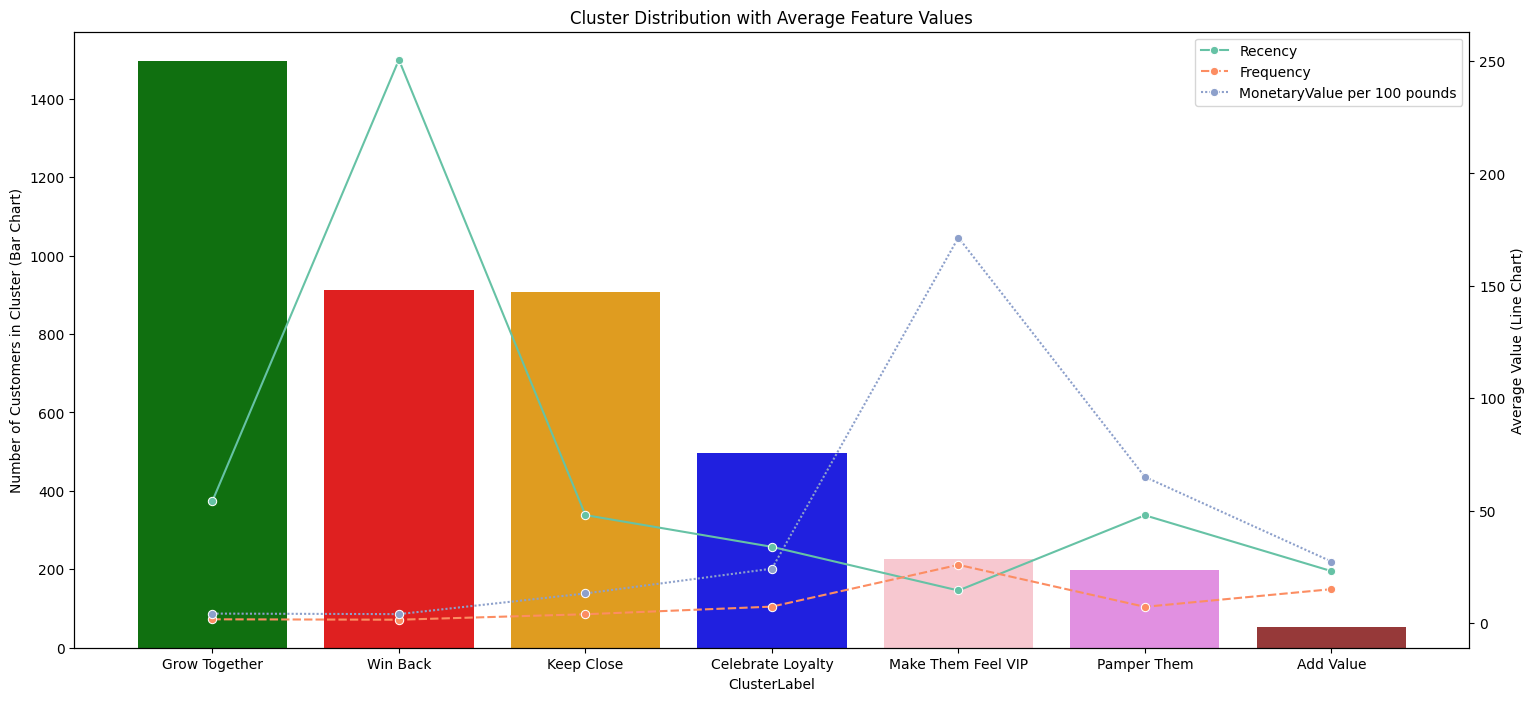

In [77]:
# Let's then visualise the summary of all clusters. This also includes the number of custromers in each cluster

cluster_colors_all = {'Win Back': 'red',
                  'Grow Together': 'green',
                  'Celebrate Loyalty': 'blue',
                  'Keep Close': 'orange',
                  'Pamper Them': 'violet',
                  'Add Value': 'brown',
                  'Make Them Feel VIP': 'pink'
                 }


cluster_size = df_all_data['ClusterLabel'].value_counts()
df_all_data["MonetaryValue per 100 pounds"] = df_all_data["MonetaryValue"] / 100.00
feature_means = df_all_data.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(18, 8))

sns.barplot(x=cluster_size.index, y=cluster_size.values, ax=ax1, palette=cluster_colors_all, hue=cluster_size.index)
ax1.set_ylabel('Number of Customers in Cluster (Bar Chart)')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value (Line Chart)')

plt.show()

# Cluster Analysis - All Clusters

Cluster 0: Red - "Win Back" <br>

* Who They Are: These are low-value, occasional buyers who haven't shopped with us in a while. They may be one-time buyers who dropped off after their initial purchase.
* Next Steps: Bring them back! Let’s run targeted marketing campaigns, offer special discounts, or send friendly reminders to encourage them to shop again. <br>

Cluster 1: Green - "Grow Together" <br>

* Who They Are: These are newer or less active customers who recently made a purchase. They may need a little more attention to become regular shoppers.
* Next Steps: Focus on relationship building. We can provide excellent customer service and offer incentives to encourage more frequent purchases and loyalty. <br>

Cluster 2: Blue - "Celebrate Loyalty" <br>

* Who They Are: Our top customers! They buy often, spend a lot, and are highly engaged. These are our most loyal shoppers.
* Next Steps: Show them they’re valued. A strong loyalty program, exclusive offers, and special recognition will help keep these customers happy and connected to our brand.

Cluster 3: Orange - "Keep Close" <br>

* Who They Are: High-value customers who buy regularly, though they might not have made a recent purchase. They’re familiar with us, but we want to keep them around.
* Next Steps: Retention is key here. Let’s consider loyalty programs, personalized offers, and consistent engagement to keep them coming back. <br>

Cluster -1: Violet (Monetary Outliers) - "Pamper Them" <br>
* Who They Are: High spenders, but they don’t shop all that often. When they do, they go big on their purchases.
* Next Steps: Keep them loyal with special, personalized offers or luxury perks that make the most of their high spending habits.

Cluster -2: Brown (Frequent Outliers) - "Add Value" <br>
* Who They Are: These are frequent buyers who spend a bit less each time but are very engaged. They’re reliable customers who might be open to a little extra.
* Next Steps: Introduce loyalty perks or bundle deals to encourage higher spending per visit and reward their steady shopping.

Cluster -3: Pink (Monetary & Frequent Outliers) - "Make Them Feel VIP" <br>
* Who They Are: The absolute top-tier! They’re frequent buyers and big spenders - the most valuable customers who deserve extra care.
* Next steps: Create VIP programs or exclusive offers to keep them loyal and ensure they feel truly valued.